In [ ]:
import vis_tk as v
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.optimize import brentq

In [ ]:
#s, p, q = v.process_file("files/cmesh113600.csv")
#v.plot_2D(p, q[:, 1], vmin = 0.7, vmax = 2, figsize=(7, 6), cmap = "inferno")
#v.animation2D("vmesh", range(0, 120000, 800), vmin = 0.8, vmax = 1.4, quantity_index=1, cmap = 'inferno', figsize=(7, 6)) # vel cmap is "bwr"
#v.animation2D("cmesh", range(0, 5000, 50), vmin = -2, vmax = 2, quantity_index=2, cmap = 'bwr', animation_name = "swe_flow_u")
v.animation1D(range(0, 200000, 2000), ["cmesh"], ["c"], 'x', ylim=(0.8, 2.2), quantity_index= [1])

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.colors import LinearSegmentedColormap

# Generate random points
np.random.seed(0)
points = np.random.rand(10, 2)

# Compute Voronoi diagram
vor = Voronoi(points)

# Get a single cell (for the first point)
region_index = vor.point_region[0]
region = vor.regions[region_index]

# Extract vertices of the Voronoi cell
if -1 not in region:
    polygon = [vor.vertices[i] for i in region]

# Create custom rainbow colormap
colors = ["red", "orange", "yellow", "green", "blue", "indigo", "violet"]
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'rainbow'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Create a meshgrid for the polygon area
polygon = np.array(polygon)
xmin, xmax = polygon[:, 0].min(), polygon[:, 0].max()
ymin, ymax = polygon[:, 1].min(), polygon[:, 1].max()

x = np.linspace(xmin, xmax, 500)
y = np.linspace(ymin, ymax, 500)
X, Y = np.meshgrid(x, y)
Z = np.linspace(0, 1, 500)[:, None]  # Gradient in the vertical direction

# Create figure and axis
fig, ax = plt.subplots()

# Plot the Voronoi cell outline
voronoi_plot_2d(vor, ax=ax, show_vertices=False, show_points=False)
ax.fill(*zip(*polygon), color='none', edgecolor='black')

# Create the PathPatch
path = Path(polygon)
patch = PathPatch(path, facecolor='none', edgecolor='black')

# Add the patch to the plot
ax.add_patch(patch)

# Display the gradient within the polygon
ax.imshow(Z, interpolation='bilinear', origin='lower', 
          extent=(xmin, xmax, ymin, ymax), cmap=cm, clip_path=patch, clip_on=True)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import brentq

# Parameter
h1 = 2.0  # Linke Höhe
h0 = 1.0  # Rechte Höhe
g = 1.0  # Gravitationskonstante
xctr = 0.5  # Zentrum der Dammbruchstelle

def find_h2(h2):
    return (h2/h1)**3 - 9*(h2/h1)**2*(h0/h1) + 16*(h2/h1)**1.5*(h0/h1) - (h2/h1)*(h0/h1)*(h0/h1+8) + (h0/h1)**3

h2 = brentq(find_h2, min(h0, h1), max(h0, h1))

c0 = np.sqrt(g * h0)
c1 = np.sqrt(g * h1)
c2 = np.sqrt(g * h2)
u2 = 2 * (c1 - c2)
xi = c0 * np.sqrt(1/8 * ((2 * (c2/c0)**2 + 1)**2 - 1))

def get_h(x, t):
    if x >= xctr + xi * t:
        return h0
    elif x <= xctr - c1 * t:
        return h1
    elif x >= xctr + (u2 - c2) * t and x < xctr + xi * t:
        return h2
    elif x >= xctr - c1 * t and x < xctr + (u2 - c2) * t:
        if t != 0:  # Avoid division by zero
            c3 = 1/3 * (2 * c1 - (x - xctr) / t)
            return c3**2 / g
    return None  # In case no condition is met

In [ ]:
t = 0.007
dx = 2000

n = 25


lsp = np.linspace(0, 1, 1000)
y = [get_h(i, 0.2) for i in lsp]

plt.ylim(0.8, 2.2)
plt.plot(lsp, y)
plt.ylabel("h")
plt.xlabel("x")
plt.title("Dam Break Problem 1D - t = 0.175")
plt.savefig("bild1.png")
#v.plot_1D(["cmesh" + str(dx * n)], [""], "x", ylim=(0.8, 2.2), save_name="image1d", x_label= "x", y_label="h")

In [ ]:
hl = 2
hr = 1
g = 1

cl = np.sqrt(g*hl)
cr = np.sqrt(g*hr)


def get_cm(cm):
    return -8 * cr**2 * cm**2 * (cl - cm)**2 + (cm**2 - cr**2)**2 * (cm**2 + cr**2)

cm = brentq(get_cm, min(cl, cr), max(cl, cr))

hm = (cm**2)/g

x0 = 0.5

def get_h_at_t_and_x(t, x, x0, cl, cm, cr, hl, hm, hr, g):

    xa = x0 - cl*t
    xb = x0 + t*(2*cl - 3*cm)
    xc = x0 + t * ((2 * cm**2 * (cl - cm))/(cm**2 - cr**2))

    if x < xa:
        return hl
    elif xa < x and x < xb:
        return (4)/(9*g) * (cl - ((x-x0)/(2*t)))**2
    elif xb < x and x < xc:
        return hm
    elif xc < x:
        return hr
    return None

t = 0.2
lsp = np.linspace(0, 1, 1000)

hanalytical = [get_h_at_t_and_x(t, i, x0, cl, cm, cr, hl, hm, hr, g) for i in lsp]


plt.plot(lsp, hanalytical)

In [ ]:
import vis_tk as v
import numpy as np
v.animation1D(range(0, 1000, 10), 
              ["cmesh", "vmesh"], 
              ["cartesian", "voronoi"], 
              "diagonal_filter", 
              [1, 1], 
              ylim = (0.8, 2.2), 
              xlim = (0, 1*np.sqrt(2)), 
              analytic_solution="swe_dam", 
              hl=2, hr = 1, x0 = 0.5*np.sqrt(2),
              save_name="8_dam_break_45_deg_v_c_analytic_filtered", 
              x_label= "diagonal distance [a.u]",
              y_label= "column height h [a.u]",
              title=r"Dam Break 45$^\circ$, Sink boundary, filtered",
              )
#v.animation2D("vmesh", range(0, 3000, 100), vmin = -0.5, vmax = 0.5, cmap = 'jet', quantity_index=2)
#v.animation2D("vmesh", 
#              range(0, 3000, 10), 
#              vmin = 1, 
#              vmax = 2, 
#              cmap = 'viridis', 
#              quantity_index=1, 
#              title = r"Dam Break 45$^\circ$, Voronoi, Sink boundary?", 
#              cbar_label="column water heigth h [a.u]", 
#              figsize=(6, 5), 
#              xlabel = "x [a.u]", 
#              ylabel = "y [a.u]", 
#              animation_name="8_dam_break_45_deg_voronoi_sink"
#              )
#v.animation2D("cmesh", range(0, 25000, 250), vmin = 1, vmax = 2, cmap = 'inferno')
#v.animation1D(range(0, 25000, 250), ["vmesh", "cmesh"], ["voronoi", "cartesian"], "x", [1, 1], ylim = (0.8, 2.2), xlim = (0, 1), analytic_solution="swe_dam")

#s, p, q = v.process_file("files/vmesh30000.csv")
#v.plot_2D(p, q[:, 1], "inferno", 0.8, 1.4)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib.collections import PolyCollection
from matplotlib.animation import FuncAnimation
from tqdm import tqdm
from scipy.optimize import curve_fit
from scipy.optimize import brentq


hl = 2
hr = 1
g = 1

cl = np.sqrt(g*hl)
cr = np.sqrt(g*hr)

def get_cm(cm):
    return -8 * cr**2 * cm**2 * (cl - cm)**2 + (cm**2 - cr**2)**2 * (cm**2 + cr**2)
                
cm = brentq(get_cm, min(cl, cr), max(cl, cr))
hm = (cm**2)/g

def get_h_at_t_and_x(x, t, x0, cl, cm, cr, hl, hm, hr, g):

    xa = x0 - cl*t
    xb = x0 + t*(2*cl - 3*cm)
    xc = x0 + t * ((2 * cm**2 * (cl - cm))/(cm**2 - cr**2))

    if x < xa:
        return hl
    elif xa < x and x < xb:
        return (4)/(9*g) * (cl - ((x-x0)/(2*t)))**2
    elif xb < x and x < xc:
        return hm
    elif xc < x:
        return hr
    return None

lsp = np.linspace(0, 1, 1000)
h_analytic = [get_h_at_t_and_x(x, 0.3, 0.5, cl, cm, cr, hl, hm, hr, g) for x in lsp]
plt.plot(lsp, h_analytic, label = 'analytic', color = 'red')

print(format(hm, '.200f'))

In [ ]:
import vis_tk as v

#v.animation1D(range(0, 5000, 50), ["cmesh"], ["c"], 'x', [1], ylim=(0.8, 2.2))

v.plot_L1_error_over_time(["0L1_N_100", "0L1_N_200", "0L1_N_300", "0L1_N_500", "0L1_N_1000", "0L1_N_3000", "0L1_N_5000"], ["100", "200", "300", "500", "1000", "3000", "5000"])

v.plot_L1_error_over_N(["0L1_N_100", "0L1_N_200", "0L1_N_300", "0L1_N_500", "0L1_N_1000", "0L1_N_3000", "0L1_N_5000", "0L1_N_10000", "0L1_N_20000"], [100, 200, 300, 500, 1000, 3000, 5000, 10000, 20000], 80)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from SWE_Solver import plotSWE
from test_SWE_Solver import plotSWE

# Bottom topography function (flat bottom)
B = lambda x: 0

# Initial water height profile with a Gaussian bump
def gaussian_bump(x, x_center, sigma, height, base_level):
    return base_level + height * np.exp(-((x - x_center) ** 2) / (2 * sigma ** 2))

# Initial water velocity profile (initially at rest)
def initial_velocity(x):
    return 0.0

# Simulation parameters
Nx = 100  # Number of spatial grid points
x = np.linspace(0, 1, Nx)  # Spatial grid
x_center = 0.1  # Center of the Gaussian bump
sigma = 0.05  # Standard deviation of the Gaussian
height = 1  # Height of the Gaussian bump
base_level = 1  # Base water level

# Generate initial height and velocity profiles
h0 = [gaussian_bump(xi, x_center, sigma, height, base_level) for xi in x]  # Initial height profile
u0 = [initial_velocity(xi) for xi in x]  # Initial velocity profile
tEnd = 0.6  # End time of the simulation
timePoints = [0.0, 0.05, 0.1, 0.2, 0.3, 0.6]  # Time points to visualize results

# Run the simulation
tupple = plotSWE(B, h0, u0, Nx, tEnd, timePoints)

In [ ]:
import vis_tk as v
import numpy as np
import matplotlib.pyplot as plt

tupple = np.array(tupple)

hs = tupple[:, 0, :]
#us = tupple[:, 1, :]

#print(len(hs[0, :]))

#np.save('array.npy', hs)


#hs = np.load('array.npy')

print(np.shape(hs))

lsp = np.linspace(0, 1, len(hs[0, :]))

plt.plot(lsp, hs[20, :], color = 'tab:orange', label = "SWE_Python")
v.plot_1D(["cmesh20"], ["Hydro_Bsc"], "x", ylim=(0, 2))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots()

def update(frame):
    ax.clear()
    ax.plot(lsp, hs[frame, :], color='tab:orange', label="SWE_Python")
    v.plot_1D([f"cmesh{frame}"], ["Hydro_Bsc"], "x", ylim=(0, 2), title="Solution compared to other solver, low res", y_label="column height h in [a.u.]", x_label="x in [a.u.]")
    ax.legend()

ani = FuncAnimation(fig, update, frames=range(0, 169, 1), repeat=False)

# Speichern als GIF
writer = PillowWriter(fps=30)
ani.save("animation.gif", writer=writer)

plt.show()

In [ ]:
import vis_tk as v
import numpy as np
import matplotlib.pyplot as plt

v.animation1D(range(0, 2500, 250), ["cmesh"], ["c"], 'x', [1], ylim=(1.45355, 1.454), analytic_solution="swe_dam") #(1.45355, 1.454)
#v.animation2D("vmesh", range(0, 2000, 40), vmin = 1, vmax = 2) 

In [ ]:
#v.plot_L1_error_over_time(["L1_error", "0L1_dam_break_1st_order/0L1_N_100"], ["now", "then"])
v.plot_L1_error_over_N(["01st/0L1_N_100", "01st/0L1_N_200", "01st/0L1_N_300", "01st/0L1_N_500", "01st/0L1_N_1000", "01st/0L1_N_5000", "01st/0L1_N_10000"], [100, 200, 300, 500, 1000, 5000, 10000], 80)
v.plot_L1_error_over_N(["02nd/0L1_N_100", "02nd/0L1_N_200", "02nd/0L1_N_300", "02nd/0L1_N_500", "02nd/0L1_N_1000",  "02nd/0L1_N_5000", "02nd/0L1_N_10000"], [100, 200, 300, 500, 1000, 5000, 10000], 80)
plt.plot()

In [ ]:
import vis_tk as v
import numpy as np
import matplotlib.pyplot as plt

#v.animation1D(range(0, 10000, 1000), ["cmesh"], ["c"], "x", [1], ylim=(0.8, 2.2), analytic_solution="swe_dam")

In [ ]:
v.plot_L1_error_over_time(["02nd/0L1_N_10000", "02nd/0L1_N_5000", "03rd/L1_error10000", "L1_error"], ["a", "b", "c", "d"])

v.plot_L1_error_over_N(["L1_error2500", "L1_error5000", "03rd/L1_error10000"], [2500, 5000, 10000], 5)
v.plot_L1_error_over_N(["01st/0L1_N_100", "01st/0L1_N_200", "01st/0L1_N_300", "01st/0L1_N_500", "01st/0L1_N_1000", "01st/0L1_N_5000", "01st/0L1_N_10000"], [100, 200, 300, 500, 1000, 5000, 10000], 80)
v.plot_L1_error_over_N(["02nd/0L1_N_100", "02nd/0L1_N_200", "02nd/0L1_N_300", "02nd/0L1_N_500", "02nd/0L1_N_1000",  "02nd/0L1_N_5000", "02nd/0L1_N_10000"], [100, 200, 300, 500, 1000, 5000, 10000], 80)

In [ ]:
v.plot_L1_error_over_time(["NL1_error2500", "NL1_error5000", "L1_error2500", "L1_error5000"], ["a", "b", "c", "d"])

v.plot_L1_error_over_N(["NL1_error2500", "NL1_error5000", "NL1_error10000"], [2500, 5000, 10000], 8)
v.plot_L1_error_over_N(["L1_error2500", "L1_error5000"], [2500, 5000], 5)
v.plot_L1_error_over_N(["01st/0L1_N_100", "01st/0L1_N_200", "01st/0L1_N_300", "01st/0L1_N_500", "01st/0L1_N_1000", "01st/0L1_N_5000", "01st/0L1_N_10000"], [100, 200, 300, 500, 1000, 5000, 10000], 80)
v.plot_L1_error_over_N(["02nd/0L1_N_100", "02nd/0L1_N_200", "02nd/0L1_N_300", "02nd/0L1_N_500", "02nd/0L1_N_1000",  "02nd/0L1_N_5000", "02nd/0L1_N_10000"], [100, 200, 300, 500, 1000, 5000, 10000], 80)

In [ ]:
import vis_tk as v


#v.plot_L1_error_over_time(["xL1_error_alg_1", "xL1_error_alg_2", "yL1_error_alg_2", "L1_error"], ["alg1", "alg2", "with wrong c_ij", "is this better?"])
#v.plot_L1_error_over_time(["x_L1_error_alg_2", "L1_error"], ["is this better?", "alg2"])

#v.animation1D(range(0, 250, 2), ["cmesh", "cmesh2_"], ["c", "c1"], "x", [1, 1], ylim=(0.8, 2.2), analytic_solution="swe_dam")
#v.animation1D(range(0, 250, 2), ["cmesh1_", "cmesh2_"], ["2nd-Order no FluxLimiter", "2nd-Order"], "x", [1, 1], ylim=(0.8, 2.2), analytic_solution="", x_label="x in [a.u.]", y_label="column height h in [a.u.]", title="Dam Break with/without Flux Limiter")
#v.animation2D("vmesh", range(0, 750, 2*4), vmin=1, vmax = 2, cbar_label="column height h in [a.u.]", xlabel="x in [a.u.]", ylabel="y in [a.u.]", figsize=(6,5))
v.animation1D(range(0, 4000, 100), ["cmesh0", "cmesh1"], ["x-dam-break", "y-dam-break"], ['x', 'y'], [1, 1], ylim=(0.8, 2.2), analytic_solution="swe_dam", x_label="x/y in [a.u.]", y_label="column height h in [a.u.]", title="Cartesian Dam Break 2D x vs. y direction")

#v.plot_L1_error_over_time(["L1_error50", "L1_error100", "L1_error200", "L1_error400", "L1_error800"], ["50", "100", "200", "400", "800"])

#v.plot_L1_error_over_N(["L1_error50_1", "L1_error100_1", "L1_error200_1", "L1_error400_1", "L1_error800_1", "L1_error10000_1"], [50, 100, 200, 400, 800, 10000], 40, "1st Order??")
#v.plot_L1_error_over_N(["L1_error50", "L1_error100", "L1_error200", "L1_error400", "L1_error800", "L1_error10000", "L1_error20000"], [50, 100, 200, 400, 800, 10000, 20000], 40, "2nd Order??")

In [ ]:
import vis_tk as v

v.animation2D("vmesh", range(0, 1000, 20), vmin = 0.5, vmax = 1.5, figsize=(7,5.7), cmap='ocean', cbar_label="column height h in [m]", title="SWE on a 100x100 grid with boundary structure (MUSCL-Scheme)", xlabel="x in [m]", ylabel="y in [m]")
#s, p, q = v.process_file("files/vmesh20.csv")
#v.plot_2D(p, q[:, 1], vmin = 0.7, vmax = 1.5, figsize=(7,5.7), cmap='viridis', cbar_label="column height h in [m]", title="SWE (MUSCL-Scheme)", xlabel="x in [m]", ylabel="y in [m]", edgecolor="black")

In [ ]:
import vis_tk as v

#v.animation1D(range(0, 5000, 100), ["cmesh0", "cmesh1"], ["MUSCL", "Naive"], ['x', 'x'], [1, 1], ylim=(0.8, 2.2), analytic_solution="swe_dam", x_label="x/y in [m]", y_label="column height h in [m]", title="Cartesian 1D Dam-Break")
v.animation1D(range(0, 6400, 800), ["cmesh1"], ["MUSCL", "Naive"], ['x', 'x'], [1, 1], ylim=(0.8, 2.2), analytic_solution="", x_label="x/y in [m]", y_label="column height h in [m]", title="Cartesian 1D Dam-Break")

v.plot_L1_error_over_time(["xL1_1st_dam_break/200", "xL1_1st_dam_break/400", "xL1_1st_dam_break/800"], ["200", "400", "800"])

[-0.80609052 -0.05607858]
[-0.99617271 -0.69969812]


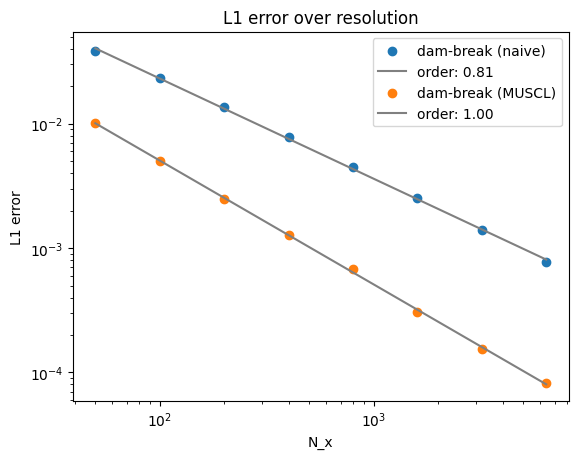

In [2]:
import vis_tk as v

v.plot_L1_error_over_N(["xL1_1st_dam_break/50", 
                        "xL1_1st_dam_break/100", 
                        "xL1_1st_dam_break/200",
                        "xL1_1st_dam_break/400",
                        "xL1_1st_dam_break/800",
                        "xL1_1st_dam_break/1600",
                        "xL1_1st_dam_break/3200",
                        "xL1_1st_dam_break/6400"], [50, 100, 200, 400, 800, 1600, 3200, 6400], dataname="dam-break (naive)")

v.plot_L1_error_over_N(["xL1_2nd_dam_break/50",
                        "xL1_2nd_dam_break/100",
                        "xL1_2nd_dam_break/200",
                        "xL1_2nd_dam_break/400",
                        "xL1_2nd_dam_break/800",
                        "xL1_2nd_dam_break/1600",
                        "xL1_2nd_dam_break/3200",
                        "xL1_2nd_dam_break/6400"], [50, 100, 200, 400, 800, 1600, 3200, 6400], dataname="dam-break (MUSCL)")

[-0.80609052 -0.05607858]
[-0.99617271 -0.69969812]
[-1.03986123 -0.85716956]


/Users/lucas_schleuss/vs code/hydro_bsc_project/src/vis_tk.py:401: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_function, np.log(x), np.log(y))


[-1.75866029 -1.1813259 ]


/Users/lucas_schleuss/vs code/hydro_bsc_project/src/vis_tk.py:401: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_function, np.log(x), np.log(y))


[-1.77975809 -1.09976683]


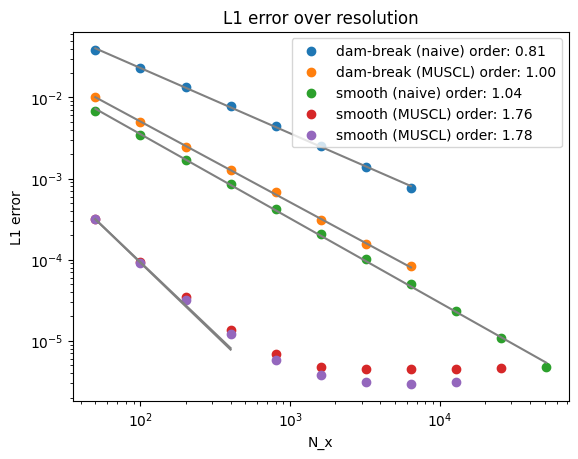

In [59]:
import vis_tk as v

import vis_tk as v

v.plot_L1_error_over_N(["xL1_1st_dam_break/50", 
                        "xL1_1st_dam_break/100", 
                        "xL1_1st_dam_break/200",
                        "xL1_1st_dam_break/400",
                        "xL1_1st_dam_break/800",
                        "xL1_1st_dam_break/1600",
                        "xL1_1st_dam_break/3200",
                        "xL1_1st_dam_break/6400"], [50, 100, 200, 400, 800, 1600, 3200, 6400], dataname="dam-break (naive)")

v.plot_L1_error_over_N(["xL1_2nd_dam_break/50",
                        "xL1_2nd_dam_break/100",
                        "xL1_2nd_dam_break/200",
                        "xL1_2nd_dam_break/400",
                        "xL1_2nd_dam_break/800",
                        "xL1_2nd_dam_break/1600",
                        "xL1_2nd_dam_break/3200",
                        "xL1_2nd_dam_break/6400"], [50, 100, 200, 400, 800, 1600, 3200, 6400], dataname="dam-break (MUSCL)")

v.plot_L1_error_over_N(["yL1_1st_smooth/cmesh50",
                        "yL1_1st_smooth/cmesh100",
                        "yL1_1st_smooth/cmesh200",
                        "yL1_1st_smooth/cmesh400",
                        "yL1_1st_smooth/cmesh800",
                        "yL1_1st_smooth/cmesh1600",
                        "yL1_1st_smooth/cmesh3200",
                        "yL1_1st_smooth/cmesh6400",
                        "yL1_1st_smooth/cmesh12800",
                        "yL1_1st_smooth/cmesh25600",
                        "yL1_1st_smooth/cmesh51200"], [50, 100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 51200], relative_path="yL1_1st_smooth/cmesh102400", dataname="smooth (naive)")

v.plot_L1_error_over_N(["yL1_2nd_smooth/cmesh50",
                        "yL1_2nd_smooth/cmesh100",
                        "yL1_2nd_smooth/cmesh200",
                        "yL1_2nd_smooth/cmesh400",
                        "yL1_2nd_smooth/cmesh800",
                        "yL1_2nd_smooth/cmesh1600",
                        "yL1_2nd_smooth/cmesh3200",
                        "yL1_2nd_smooth/cmesh6400",
                        "yL1_2nd_smooth/cmesh12800",
                        "yL1_2nd_smooth/cmesh25600",
                        ], [50, 100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600], relative_path="yL1_1st_smooth/cmesh102400", only_first_two=True, dataname= "smooth (MUSCL)")

v.plot_L1_error_over_N(["yL1_2nd_smooth/cmesh50",
                        "yL1_2nd_smooth/cmesh100",
                        "yL1_2nd_smooth/cmesh200",
                        "yL1_2nd_smooth/cmesh400",
                        "yL1_2nd_smooth/cmesh800",
                        "yL1_2nd_smooth/cmesh1600",
                        "yL1_2nd_smooth/cmesh3200",
                        "yL1_2nd_smooth/cmesh6400",
                        "yL1_2nd_smooth/cmesh12800",
                        "yL1_2nd_smooth/cmesh25600",
                        ], [50, 100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600], relative_path="yL1_2nd_smooth/cmesh25600", only_first_two=True, dataname= "smooth (MUSCL)")

In [ ]:
import vis_tk as v

v.plot_1D(["yL1_2nd_smooth/cmesh50", "yL1_1st_smooth/cmesh50"], ["", ""], 'x', ylim=(0.8, 2))

In [ ]:
import numpy as np

s, p, q = v.process_file("files/yL1_1st_smooth/cmesh102400.csv", "x")

analytic = np.array(q[:, 1])

print(np.shape(analytic))

In [ ]:
import numpy as np

def average_pairs(arr):
    return np.mean(arr.reshape(-1, 2), axis=1)

# Example usage
arr = np.array([2, 2, 2, 4, 4, 6, 1, 2])
result = average_pairs(arr)
print(result)  # Output: [1.5 3.5 5.5]

In [ ]:
def get_L1_rel(analytic, test):

    sa, pa, qa = v.process_file("files/" + analytic + ".csv", "x")
    s, p, q = v.process_file("files/" + test + ".csv", "x")

    h_ana = qa[:, 1]
    h_test = q[:, 1]

    nr = int(np.log(len(h_ana)/len(h_test))/np.log(2))
    
    for i in range(nr):
        h_ana = np.mean(h_ana.reshape(-1, 2), axis = 1)

    return np.sum(np.abs(h_ana-h_test))/len(h_test)


get_L1_rel("yL1_1st_smooth/cmesh102400", "yL1_1st_smooth/cmesh50")

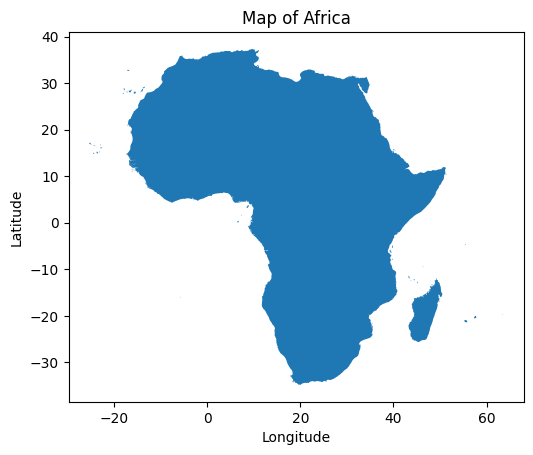

0    MULTIPOLYGON (((34.21667 31.32333, 34.23917 31...
Name: geometry, dtype: geometry

In [57]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to the .shp file
shapefile_path = 'Africa.shp'

# Load the shapefile using GeoPandas
gdf = gpd.read_file(shapefile_path)

# Plot the shapefile
gdf.plot()
plt.title('Map of Africa')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

gdf.geometry

Generating Animation: 21it [00:03,  6.94it/s]                        


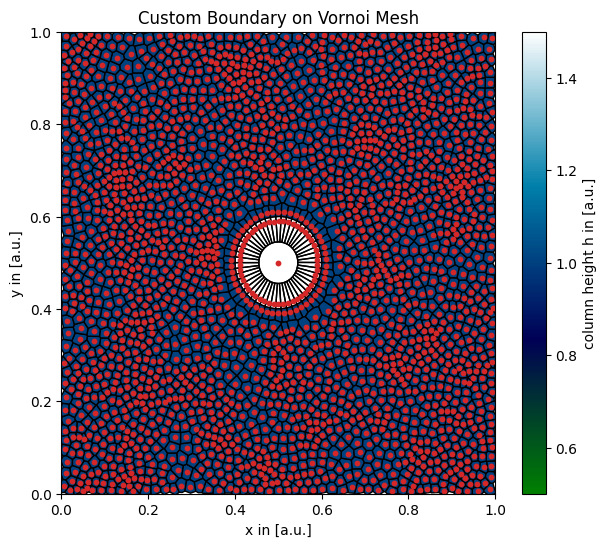

In [711]:
import vis_tk as v

#s, p, q = v.process_file("files/vmesh0.csv")
#v.plot_2D(p, q[:, 1], vmin= 1, vmax = 2, edgecolor="gray", figsize=(7, 6))
#v.animation2D("vmesh", range(0, 450, 25), vmin = 0.5, vmax = 1.5, plot_seeds=True, edgecolor="black", figsize=(7,6), cmap="ocean", cbar_label="column height h in [a.u.]", xlabel="x in [a.u.]", ylabel="y in [a.u.]", title = "Custom Boundary on Vornoi Mesh")

In [69]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import random

# Parameters
num_points = 200
radius = 0.05

# Generate points
points = [(radius * math.cos(-2 * math.pi * i / num_points) + 0.3 + random.random()*0.0005,
           radius * math.sin(-2 * math.pi * i / num_points) + 0.5 + random.random()*0.0005) for i in range(num_points)]

# Write to CSV
with open('files/struct.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for point in points:
        writer.writerow(point)

print(np.shape(points))


(200, 2)


7124
179


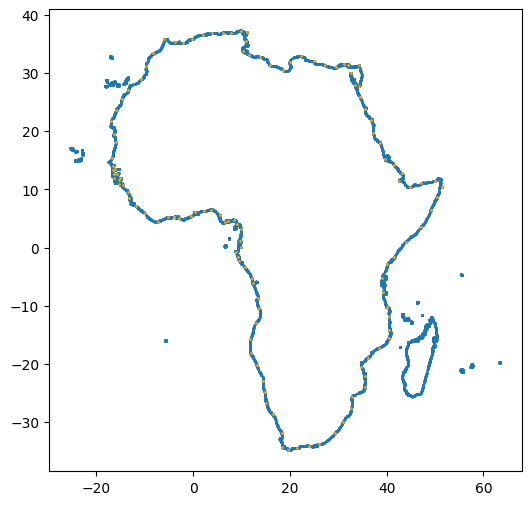

(124, 2)
(124, 2)


In [93]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load the coastline data
coastline = gpd.read_file('shapefiles_coastlines/Africa.shp')

coords = coastline.get_coordinates()

x = coords["x"].to_numpy()#/110 + 0.45
y = coords["y"].to_numpy()#/110 + 0.55

plt.figure(figsize=(6.1,6))
plt.scatter(x, y, s = 1)

x_red = []
y_red = []

print(len(x))

for i in range(1, len(x), 40):
    x_red.append(x[i])
    y_red.append(y[i])

print(len(x_red))


a = 0
b = 124


plt.scatter(x_red[a:b], y_red[a:b], color = 'orange', s = 1)
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.show()

x_s = x_red[a:b]
y_s = y_red[a:b]

points = [(x_s[i], y_s[i]) for i in range(len(x_s))]

print(np.shape(points))

# Write to CSV
with open('files/struct.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for point in points:
        writer.writerow(point)

print(np.shape(points))


finished PolyCollection


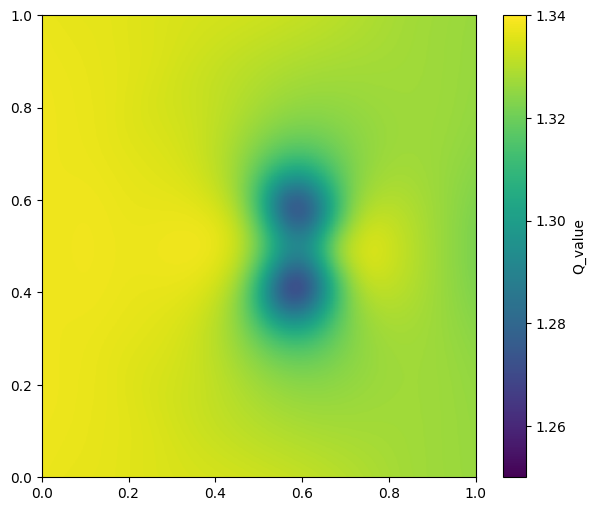

finished PolyCollection


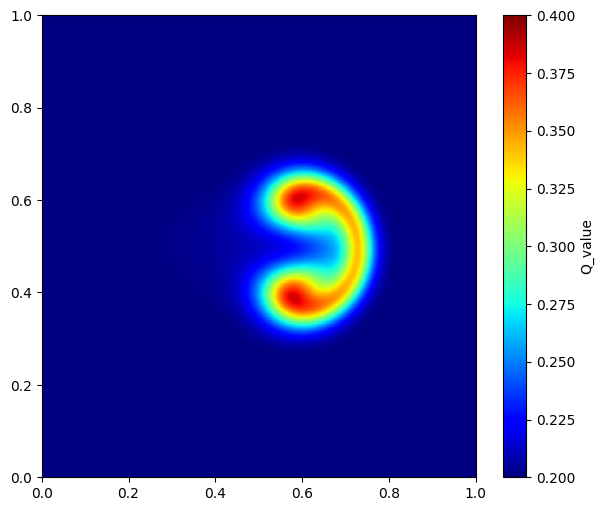

finished PolyCollection


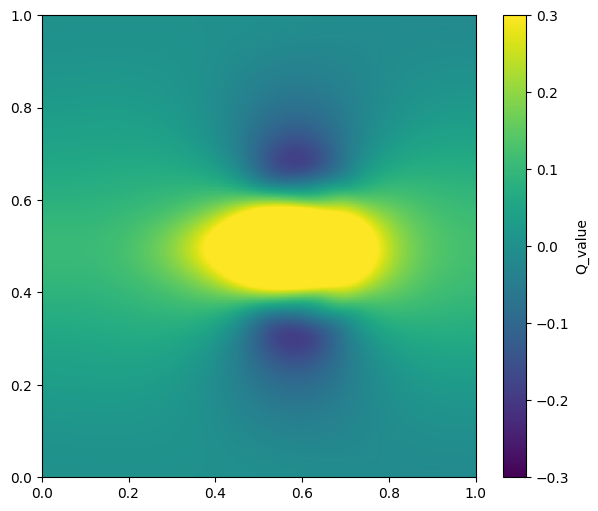

In [166]:
import vis_tk as v
import numpy as np
import matplotlib as plt

#s, p, q = v.process_file("files/cmesh3600.csv")
v.plot_2D(p, q[:, 5], vmin = 1.25, vmax = 1.34, edgecolor="face", figsize=(7,6), cmap="viridis")
v.plot_2D(p, q[:, 1], vmin = 0.2, vmax = 0.4, edgecolor="face", figsize=(7,6), cmap="jet") 
v.plot_2D(p, q[:, 2], vmin = -0.3, vmax = 0.3, edgecolor="face", figsize=(7,6), cmap="viridis")
#v.animation1D(range(0, 15000, 625), ["cmesh"], ["c"], ["x"], [5], ylim=(0, 1.1))
#v.animation2D("cmesh", range(0, 4500, 100), vmin = 0.1, vmax = 1.0, edgecolor="face", figsize=(7,6), cmap="jet")

dict_keys(['x', 'p', 'rho', 'u', 'energy', 'rho_total'])


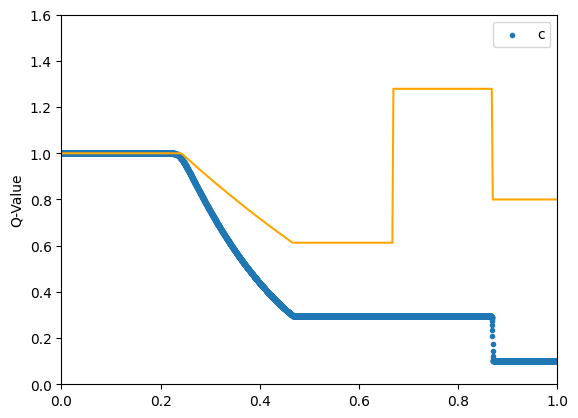

In [1]:

import vis_tk as v
import sodshock
import matplotlib.pyplot as plt


if __name__ == '__main__':

    gamma = 5.0/3.0
    dustFrac = 0.0
    npts = 500
    t = 0.2
    left_state = (1,1,0)
    right_state = (0.1, 0.125, 0.)

    # left_state and right_state set pressure, density and u (velocity)
    # geometry sets left boundary on 0., right boundary on 1 and initial
    # position of the shock xi on 0.5
    # t is the time evolution for which positions and states in tube should be 
    # calculated
    # gamma denotes specific heat
    # note that gamma and npts are default parameters (1.4 and 500) in solve 
    # function
positions, regions, values = sodshock.solve(left_state=left_state, \
    right_state=right_state, geometry=(0., 1., 0.5), t=t, 
    gamma=gamma, npts=npts, dustFrac=dustFrac)

print(values.keys())

plt.plot(values['x'], values['p']/values['rho'], color = 'orange')
v.plot_1D(["cmesh10000"], ["c"], 'x', quantity_index=5, ylim=(0, 1.6))

Generating Animation: 100%|██████████| 2/2 [00:00<00:00, 15.02it/s]

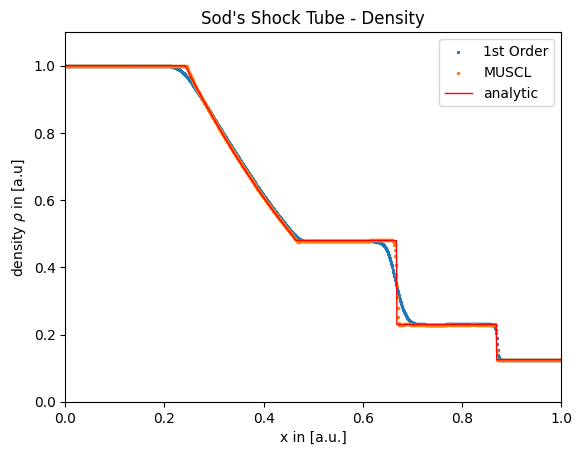

Generating Animation: 3it [00:00,  5.77it/s]                       


In [577]:
import vis_tk as v
import numpy as np

#v.animation1D([0, 1000], ["cmesh", "cmeshy"], ["x-direction", "y-direction"], ['x', "y"], [1, 1], analytic_solution="shock_tube", 
#              ylim=(0, 1.1), title="Sod's Shock Tube - Density", x_label="x in [a.u.]", y_label= r"density $\rho$ in [a.u]")


v.animation1D([0, 2000], ["cmesha", "cmeshb"], ["1st Order", "MUSCL"], ['x', "x"], [1, 1], analytic_solution="shock_tube", 
              ylim=(0, 1.1), xlim = (0, 1), x0 = 0.5, title="Sod's Shock Tube - Density", x_label="x in [a.u.]", y_label= r"density $\rho$ in [a.u]")


#s, p, q = v.process_file("files/cmesh145.csv", 'x')
#v.plot_2D(p, q[:, 1], vmin = 0, vmax = 1.1)

#v.plot_1D(["cmesh1000"], ["c"], 'x', ylim=(0, 1.1))


finished PolyCollection


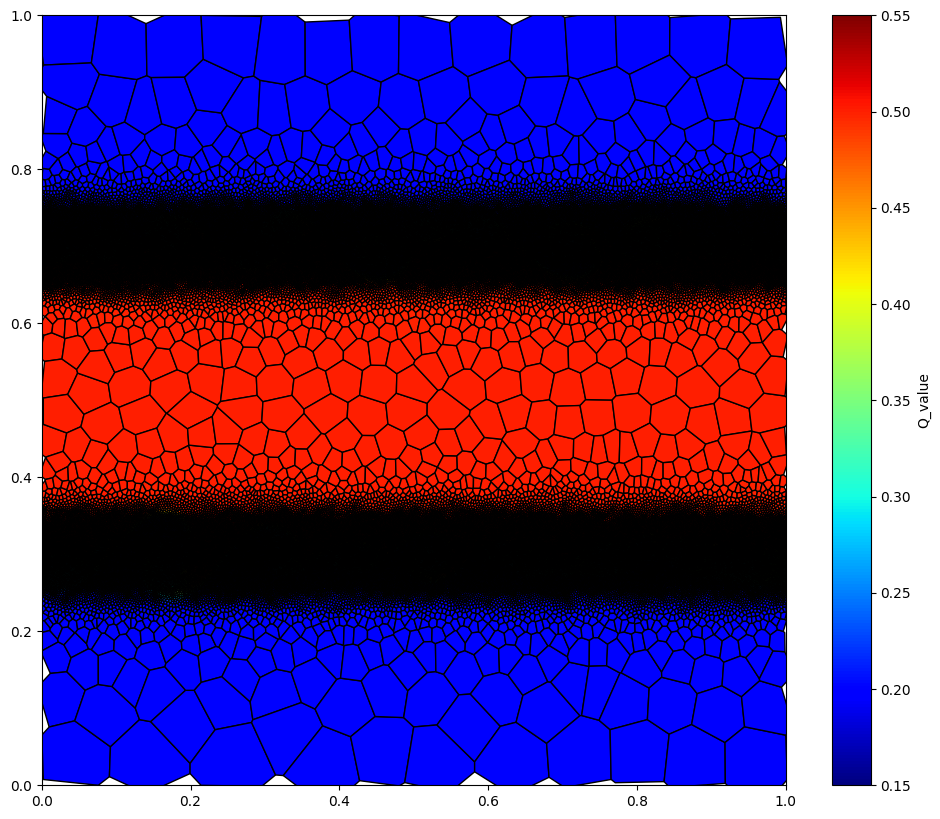

Generating Animation: 91it [07:03,  4.65s/it]                        


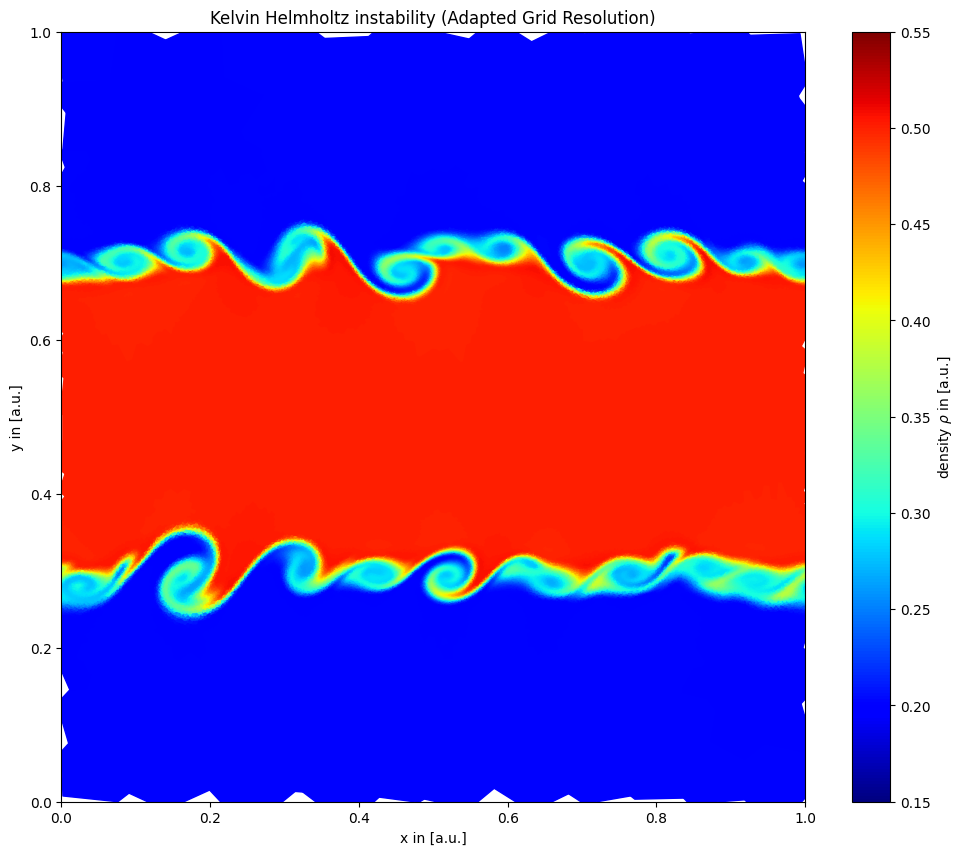

In [912]:
import vis_tk as v

s, p, q = v.process_file("files/vmesh17000.csv", 'x') # 2000
v.plot_2D(p, q[:, 1], vmin = 0.15, vmax = 0.55, cmap='jet', edgecolor='black') # 0.15, 0.25
#v.plot_2D(p, q[:, 5], vmin = 0.55, vmax = 0.7, cmap='viridis', figsize=(6,5)) # 0.15, 0.25

#plt.scatter(s[:, 0], s[:, 1], s=0.5)

v.animation2D("vmesh", range(0, 17500, 200), fps = 15, cbar_label= r"density $\rho$ in [a.u.]", vmin = 0.15, vmax = 0.55, title= 'Kelvin Helmholtz instability (Adapted Grid Resolution)', xlabel='x in [a.u.]', ylabel='y in [a.u.]', cmap = "jet")

finished PolyCollection


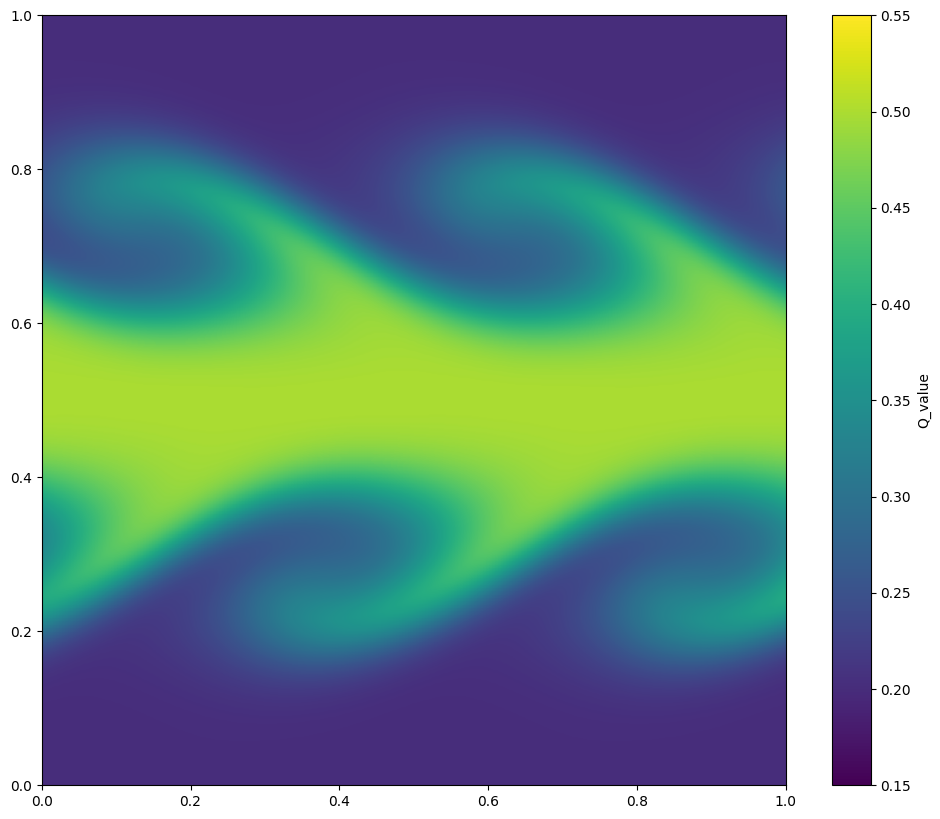

In [475]:
v.plot_2D(p, q[:, 1], vmin = 0.15, vmax = 0.55, cmap='viridis')

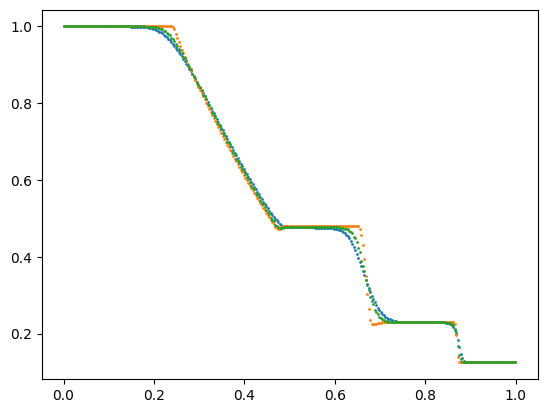

In [945]:
import vis_tk as v
import numpy as np
import matplotlib.pyplot as plt


s, p, q = v.process_file("files/cmesh_1st-order_600.csv", 'x')
s2, p2, q2 = v.process_file("files/cmesh_old_slopelim_600.csv", 'x')
s3, p3, q3 = v.process_file("files/cmesh_tvd_slopelim_600.csv", 'x')

plt.scatter(s[:, 0], q[:, 1], s=1)
plt.scatter(s2[:, 0], q2[:, 1], s=1)
plt.scatter(s3[:, 0], q3[:, 1], s=1)
plt.show()

Generating Animation: 13it [00:00, 15.60it/s]                        

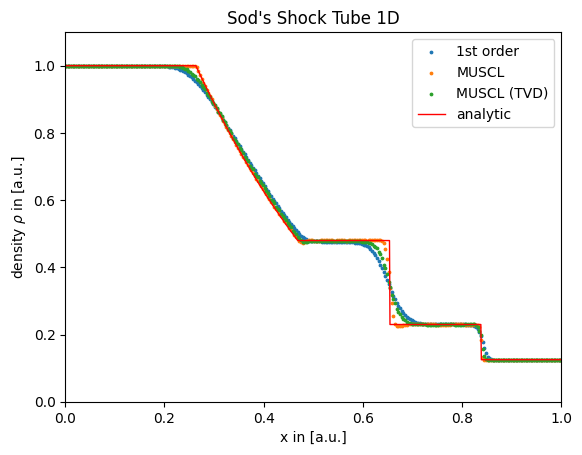

Generating Animation: 13it [00:01, 11.18it/s]


In [1]:
import vis_tk as v

v.animation1D(range(0, 600, 50), ["cmesh_1st-order_", "cmesh_old_slopelim_", "cmesh_tvd_slopelim_"], ["1st order", "MUSCL", "MUSCL (TVD)"], ['x', 'x', 'x'], [1, 1, 1],
              title="Sod's Shock Tube 1D", x_label='x in [a.u.]', y_label=r'density $\rho$ in [a.u.]', analytic_solution="shock_tube", ylim=(0, 1.1))

Generating Animation: 153it [02:32,  1.00it/s]                         


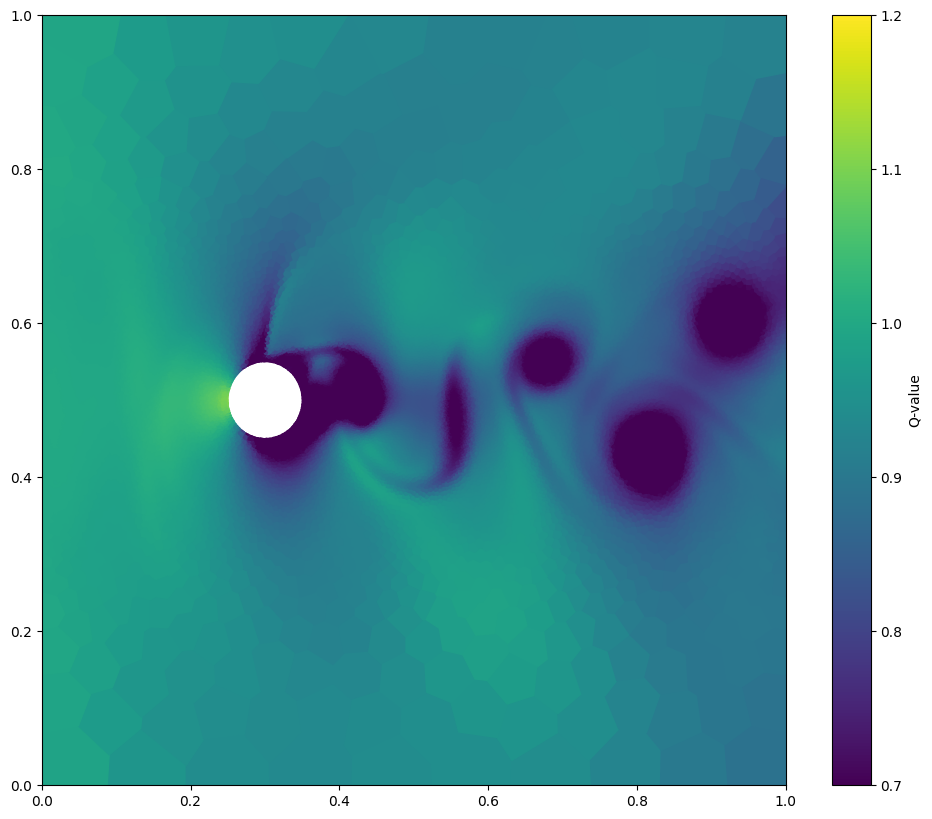

In [84]:
import vis_tk as v
import matplotlib.pyplot as plt

#s, p, q = v.process_file("files/vmesh30000.csv", "x")
#v.plot_2D(p, q[:, 1], vmin = 0.7, vmax =1.2, cmap='viridis')

v.animation2D("vmesh", range(0, 30000, 200), vmin = 0.7, vmax= 1.2)

#v.animation2D("vmesh5_", range(0, 36250, 100), cmap = 'plasma', vmin=0, vmax = 1.5, cbar_label=r"density $\rho$ in [a.u.]", title='Quad Shock', xlabel='x in [a.u.]', ylabel='y in [a.u.]', fps = 30)

Generating Animation: 3it [00:06,  2.25s/it]                       

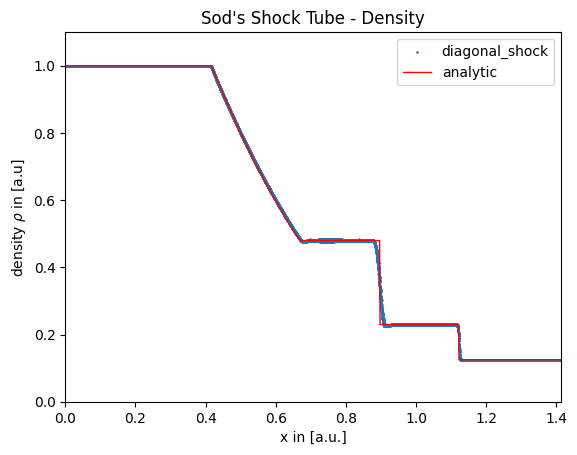

Generating Animation: 3it [00:06,  2.27s/it]


In [13]:
import vis_tk as v
import numpy as np

v.animation1D([0, 900], ["vmesh"], ["diagonal_shock"], ['diagonal_filter'], [1], analytic_solution="shock_tube", 
              ylim=(0, 1.1), xlim = (0, 1*np.sqrt(2)), x0 = 0.5*np.sqrt(2), title="Sod's Shock Tube - Density", x_label="x in [a.u.]", y_label= r"density $\rho$ in [a.u]")



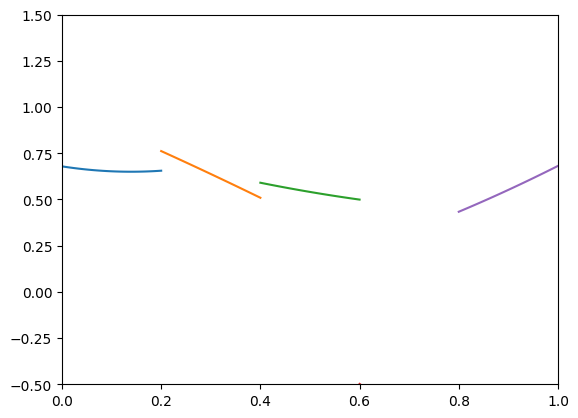

In [189]:
## first test of DG 1D advection
import numpy as np
import matplotlib.pyplot as plt


u = -1   # advection speed
N_p = 2 # highest order polynomial
K = 5  # Number of Elements

dof = K * (N_p + 1)

# basis functions are phi1 = 1, phi2 = x and phi3 = x^2
def phi1(x_hat):
    if abs(x_hat) <= 1:
        return 1
    else:
        return 0

def phi2(x_hat):
    if abs(x_hat) <= 1:
        return x_hat
    else:
        return 0

def phi3(x_hat):
    if abs(x_hat) <= 1:
        return x_hat * x_hat
    else:
        return 0

# initial condition
Q_0 = np.zeros((dof))
for i in range(0, int(len(Q_0)/2), 3):
    Q_0[i] = 1

# local Mass matrix
Mk_ij = (1/(2*K)) * np.array([[2, 0, 2.0/3.0], [0, 2.0/3.0, 0], [2.0/3.0, 0, 2.0/5.0]])

# assemble global Mass matrix
M = np.zeros((dof, dof))
for i in range(0, dof, 3):
    M[i:i+3, i:i+3] = Mk_ij

# local advection matrix
Sk_ij = np.array([[0, 0, 0], [2, 0, 2.0/3.0], [0, 2.0/3.0, 0]])

# assemble global advection matrix
S = np.zeros((dof, dof))
for i in range(0, dof, 3):
    S[i:i+3, i:i+3] = Sk_ij

# boundary interactions that need to be added to advection matrix (upwind scheme)
one = np.ones((3, 3))
interaction = np.zeros((dof, dof))
for i in range(0, dof, 3):
    interaction[i:i+3, i:i+3] = -1 * one
    if (i+6 <= dof):
        interaction[i+3:i+6, i:i+3] = one

# map from Q to RHS(Q)
RHS_ij = (S + interaction)*u

# invert global M
M_inv = np.linalg.inv(M)

change_Q = M_inv @ RHS_ij @ Q_0

Q_n = Q_0
Q_np1 = Q_0

total_time = 1
steps = 100
dt = total_time/steps

lsp = np.linspace(0, total_time, steps)

Qs = [Q_0]

for i in lsp:
    Q_np1 = Q_n + dt * (M_inv @ RHS_ij @ Q_n)
    Qs.append(Q_np1)
    Q_n = Q_np1

Qs = np.array(Qs)

elements0 = np.array([Qs[3][i:i+3] for i in range(0, dof, 3)])

def plot_element(element_coeff, k):
    xs = np.linspace(0 + k*(1/K), (1/K) + k*(1/K))
    ys = [element_coeff[0] * phi1(x) + element_coeff[1] * phi2(x) + element_coeff[2] * phi3(x) for x in xs]
    plt.xlim(0, 1)
    plt.ylim(-0.5, 1.5)
    plt.plot(xs, ys)


for i in range(len(elements0)):
    plot_element(elements0[i], i)


[[20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 20.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20.  0.  0.  0.  0.

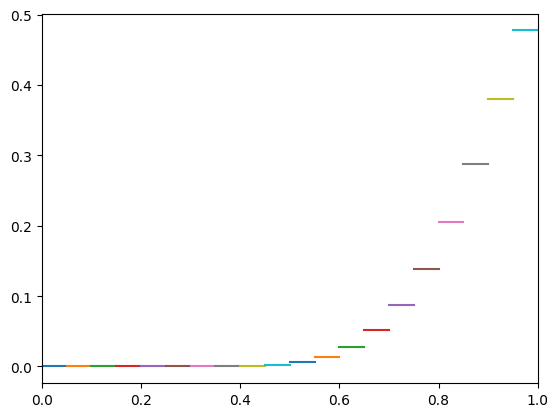

In [19]:
## second test of DG 1D advection
import numpy as np
import matplotlib.pyplot as plt


u = 1   # advection speed
N_p = 0 # highest order polynomial
K = 20  # Number of Elements

dof = K * (N_p + 1)

# basis functions are phi1 = 1, phi2 = x and phi3 = x^2
def phi1(x_hat):
    if abs(x_hat) <= 1:
        return 1
    else:
        return 0

# initial condition
Q_0 = np.zeros((dof))
for i in range(0, int(len(Q_0)/2), 1):
    Q_0[i] = 1

# local Mass matrix
Mk_ij = (1/(2*K)) * 2

# assemble global Mass matrix
M = np.zeros((dof, dof))
for i in range(0, dof, 1):
    M[i:i+1, i:i+1] = Mk_ij

# local advection matrix
Sk_ij = 0

# assemble global advection matrix
S = np.zeros((dof, dof))

# boundary interactions that need to be added to advection matrix (upwind scheme)
interaction = np.zeros((dof, dof))
for i in range(0, dof, 1):
    interaction[i:i+1, i:i+1] = -1
    if (i+2 <= dof):
        interaction[i+1:i+2, i:i+1] = 1

interaction[0][0] = -1

# map from Q to RHS(Q)
RHS_ij = (S + interaction)*u

# invert global M
M_inv = np.linalg.inv(M)

Q_n = Q_0
Q_np1 = Q_0

total_time = 1
steps = 100
dt = total_time/steps

lsp = np.linspace(0, total_time, steps)

Qs = [Q_0]

print(M_inv)

print(RHS_ij)

for i in lsp:
    Q_np1 = Q_n + dt * (M_inv @ RHS_ij @ Q_n)
    Qs.append(Q_np1)
    Q_n = Q_np1

Qs = np.array(Qs)

x = np.linspace(0, 1, K)

def plot_element(element_coeff, k):
    xs = np.linspace(0 + k*(1/K), (1/K) + k*(1/K), 100)
    ys = [element_coeff[0] * phi1(x) for x in xs]
    plt.xlim(0, 1)
    plt.plot(xs, ys)

for i in range(len(Qs[0])):
    plot_element([Qs[99][i]], i)




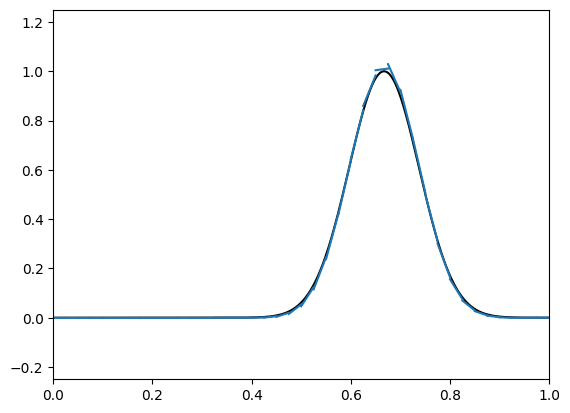

In [24]:
## third test of DG 1D advection
import numpy as np
import matplotlib.pyplot as plt


u = 1   # advection speed
N_p = 1 # highest order polynomial
K = 40  # Number of Elements

dof = K * (N_p + 1)

# basis functions are phi1 = 1, phi2 = x and phi3 = x^2
def phi1(x_hat):
    if abs(x_hat) <= 1:
        return 1
    else:
        return 0

def phi2(x_hat):
    if abs(x_hat) <= 1:
        return x_hat
    else:
        return 0

# initial condition
Q_0 = np.zeros((dof))
for i in range(0, int(len(Q_0)/2), 2):
    #Q_0[i] = 1
    Q_0[i] = np.exp(-(10*(i/(2*K) - 0.25))**2)
    Q_0[i+1] = (-200*((i/(2*K))-0.25) * np.exp(- (10*((i/(2*K))-0.25))**2)/K)*0.5

# local Mass matrix
Mk_ij = (1/(2*K)) * np.array([[2, 0], [0, 2.0/3.0]])

# assemble global Mass matrix
M = np.zeros((dof, dof))
for i in range(0, dof, 2):
    M[i:i+2, i:i+2] = Mk_ij


# local advection matrix
Sk_ij = np.array([[0, 0], [2, 0]])

# assemble global advection matrix
S = np.zeros((dof, dof))
for i in range(0, dof, 2):
    S[i:i+2, i:i+2] = Sk_ij


# boundary interactions that need to be added to advection matrix (upwind scheme)
one = np.ones((2, 2))
interaction = np.zeros((dof, dof))
for i in range(0, dof, 2):
    interaction[i:i+2, i:i+2] = -1 * one
    if (i+4 <= dof):
        interaction[i+2:i+4, i:i+2] = np.array([[1, 1], [-1, -1]])


# map from Q to RHS(Q)
RHS_ij = (S + interaction)*u

# invert global M
M_inv = np.linalg.inv(M)

Q_n = Q_0
Q_np1 = Q_0

total_time = 1
steps = 2000
dt = total_time/steps

lsp = np.linspace(0, total_time, steps)

Qs = [Q_0]

for i in lsp:
    Q_np1 = Q_n + dt * (M_inv @ RHS_ij @ Q_n)
    Qs.append(Q_np1)
    Q_n = Q_np1

Qs = np.array(Qs)

elements = np.array([np.array([Qs[j][i:i+2] for i in range(0, dof, 2)]) for j in range(0, steps)])

def plot_element(element_coeff, k):
    xs = np.linspace(0 + k*(1/K), (1/K) + k*(1/K), 100)
    xhats = np.linspace(-1, 1, 100)
    ys = [element_coeff[0] * phi1(x) + element_coeff[1] * phi2(x) for x in xhats]
    plt.xlim(0, 1)
    plt.ylim(-0.25, 1.25)
    plt.plot(xs, ys, color='tab:blue')

index = 810

x = np.linspace(0, 1, 1000)
y = np.exp(-(10*(x - 0.262 - dt*index))**2)

def block(x, t):
    if abs(x - 0.25 - t) < 0.25:
        return 1
    else:
        return 0
    
#y = [block(xi, dt*index) for xi in x]

plt.plot(x, y, color = 'black')

for i in range(len(elements[0])):
    plot_element(elements[index][i], i)

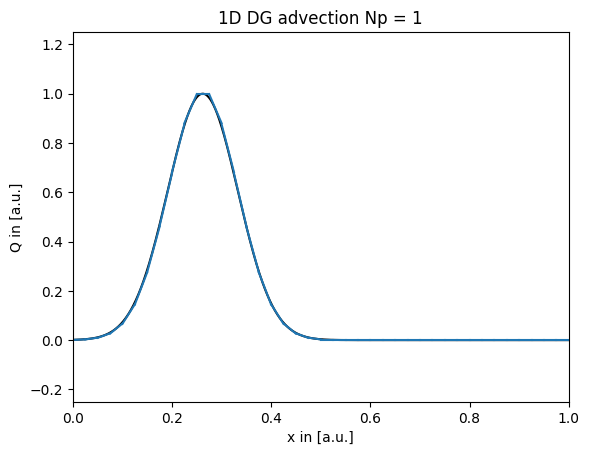

In [25]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Annahme: `your_plot_function(index)` erstellt den gewünschten Plot für einen bestimmten Index
def your_plot_function(index):

    x = np.linspace(0, 1, 1000)
    y = np.exp(-(10*(x - 0.262 - dt*index))**2)

    #def block(x, t):
    #    if abs(x - 0.25 - t) < 0.25:
    #        return 1
    #    else:
    #        return 0
    
    #y = [block(xi, dt*index) for xi in x]

    plt.plot(x, y, color = 'black')

    for i in range(len(elements[0])):
        plot_element(elements[index][i], i)

    plt.title("1D DG advection Np = 1")
    plt.xlabel("x in [a.u.]")
    plt.ylabel("Q in [a.u.]")

# Initialisiere die Figur und Achsen
fig, ax = plt.subplots()

# Update-Funktion für die Animation
def update(index):
    ax.clear()  # Löscht den vorherigen Plot
    your_plot_function(index)  # Erzeugt den neuen Plot

# Erstelle die Animation
ani = animation.FuncAnimation(fig, update, frames=range(0, 2000, 5), repeat=False)

# Speichern oder anzeigen
ani.save('animation.gif', writer='ffmpeg', fps=30)  # Speichern als MP4
# plt.show()  # Alternativ anzeigen

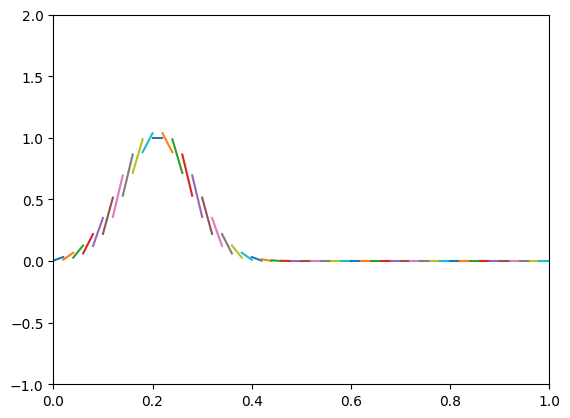

In [15]:
## first test of DG 1D advection
import numpy as np
import matplotlib.pyplot as plt


u = 1   # advection speed
N_p = 2 # highest order polynomial
K = 50  # Number of Elements

dof = K * (N_p + 1)

# basis functions are phi1 = 1, phi2 = x and phi3 = x^2
def phi1(x_hat):
    if abs(x_hat) <= 1:
        return 1
    else:
        return 0

def phi2(x_hat):
    if abs(x_hat) <= 1:
        return x_hat
    else:
        return 0

def phi3(x_hat):
    if abs(x_hat) <= 1:
        return x_hat * x_hat
    else:
        return 0

# initial condition
Q_0 = np.zeros((dof))
for i in range(0, int(len(Q_0)/2), 3):
    Q_0[i] = np.exp(-(10*(i/(3*K) - 0.2))**2)
    Q_0[i+1] = -200*((i/(3*K))-0.2) * np.exp(- (10*((i/(3*K))-0.2))**2)/K

# local Mass matrix
Mk_ij = (1/(2*K)) * np.array([[2, 0, 2.0/3.0], [0, 2.0/3.0, 0], [2.0/3.0, 0, 2.0/5.0]])

# assemble global Mass matrix
M = np.zeros((dof, dof))
for i in range(0, dof, 3):
    M[i:i+3, i:i+3] = Mk_ij

# local advection matrix
Sk_ij = np.array([[0, 0, 0], [2, 0, 2.0/3.0], [0, 2.0/3.0, 0]])

# assemble global advection matrix
S = np.zeros((dof, dof))
for i in range(0, dof, 3):
    S[i:i+3, i:i+3] = Sk_ij

# boundary interactions that need to be added to advection matrix (upwind scheme)
one = np.ones((3, 3))
interaction = np.zeros((dof, dof))
for i in range(0, dof, 3):
    interaction[i:i+3, i:i+3] = -1 * one
    if (i+6 <= dof):
        interaction[i+3:i+6, i:i+3] = np.array([[1, 1, 1], [-1, -1, -1], [1, 1, 1]])

# map from Q to RHS(Q)
RHS_ij = (S + interaction)*u

# invert global M
M_inv = np.linalg.inv(M)

change_Q = M_inv @ RHS_ij @ Q_0

Q_n = Q_0
Q_np1 = Q_0

total_time = 1
steps = 3000
dt = total_time/steps

lsp = np.linspace(0, total_time, steps)

Qs = [Q_0]

for i in lsp:
    Q_np1 = Q_n + dt * (M_inv @ RHS_ij @ Q_n)
    Qs.append(Q_np1)
    Q_n = Q_np1

Qs = np.array(Qs)

elements0 = np.array([Qs[0][i:i+3] for i in range(0, dof, 3)])

def plot_element(element_coeff, k):
    xs = np.linspace(0 + k*(1/K), (1/K) + k*(1/K), 100)
    x_hats = np.linspace(-1, 1, 100)
    ys = [(element_coeff[0] * phi1(x_hat) + element_coeff[1]*phi2(x_hat) + element_coeff[2]*phi3(x_hat)) for x_hat in x_hats]
    plt.xlim(0, 1)
    plt.ylim(-1, 2)
    plt.plot(xs, ys)


for i in range(len(elements0)):
    plot_element(elements0[i], i)


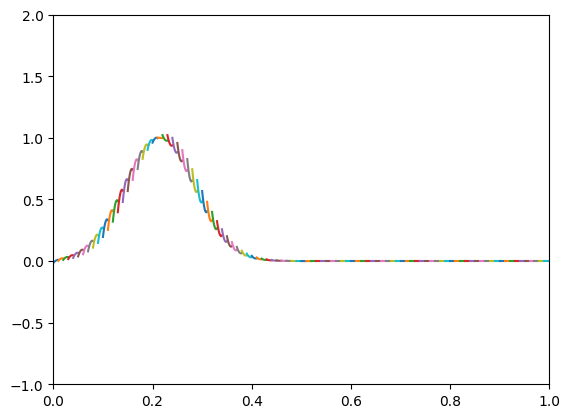

In [375]:
elements0 = np.array([Qs[30][i:i+3] for i in range(0, dof, 3)])
for i in range(len(elements0)):
    plot_element(elements0[i], i)

finished PolyCollection
finished PolyCollection
finished PolyCollection


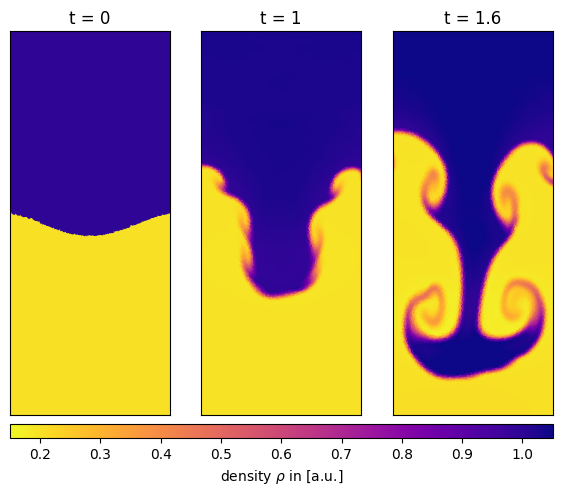

In [1]:
import vis_tk as v
import matplotlib.pyplot as plt

s, p, q = v.process_file('files/rayleigh_taylor_instab_425x425/vmesh_RT_2_425x425_0.csv') # 0, 12000, 17000
s2, p2, q2 = v.process_file('files/rayleigh_taylor_instab_425x425/vmesh_RT_2_425x425_10700.csv') # 0, 12000, 17000
s3, p3, q3 = v.process_file('files/rayleigh_taylor_instab_425x425/vmesh_RT_2_425x425_17000.csv') # 0, 12000, 17000
v.plot_2Dx3(p, p2, p3, q[:, 1], q2[:, 1], q3[:, 1], 'plasma_r', 0.15, 1.05, figsize=(7, 6), xlim=(0.04, 0.46), ylim=(0.02, 0.98), cbar_label=r'density $\rho$ in [a.u.]')
#s, p, q = v.process_file('files/vmesh_RT_2_425x425_17000.csv') # 0, 12000, 17000
#v.plot_2D(p, q[:, 1], 'plasma_r', 0.1, 1.2, figsize=(4, 6), xlim=(0.05, 0.45), ylim=(0.02, 0.98))

#v.animation2D("vmesh_RT_2_425x425_", range(0, 25000, 100), 25, cmap="plasma", vmin= 0.1, vmax = 1.2, cbar_label=r"density $\rho$ in [a.u.]")

finished PolyCollection


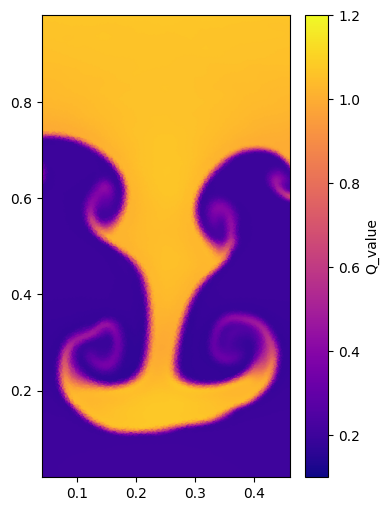

In [5]:
s, p, q = v.process_file('files/vmesh_RT_2_425x425_17000.csv') # 0, 12000, 17000
v.plot_2D(p, q[:, 1], 'plasma', 0.1, 1.2, figsize=(4, 6), xlim=(0.04, 0.46), ylim=(0.02, 0.98))


finished PolyCollection


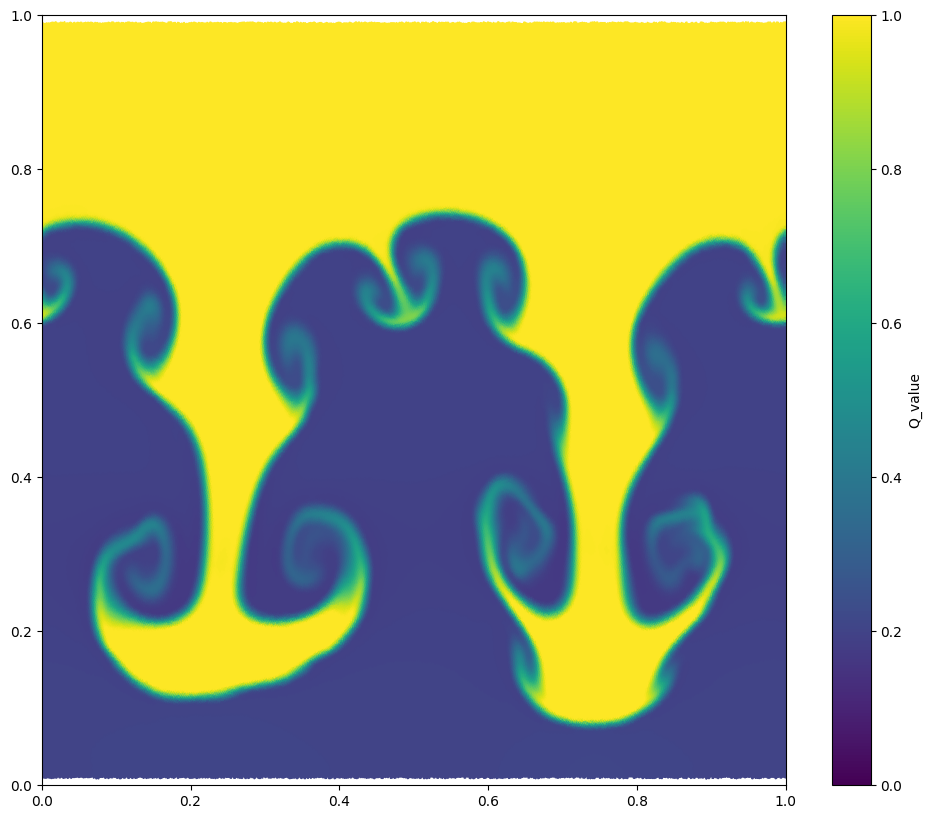

In [6]:
import vis_tk as v

s, p, q = v.process_file("files/rayleigh_taylor_instab_425x425/vmesh_RT_2_425x425_17000.csv", "x")
v.plot_2D(p, q[:, 1])

finished PolyCollection


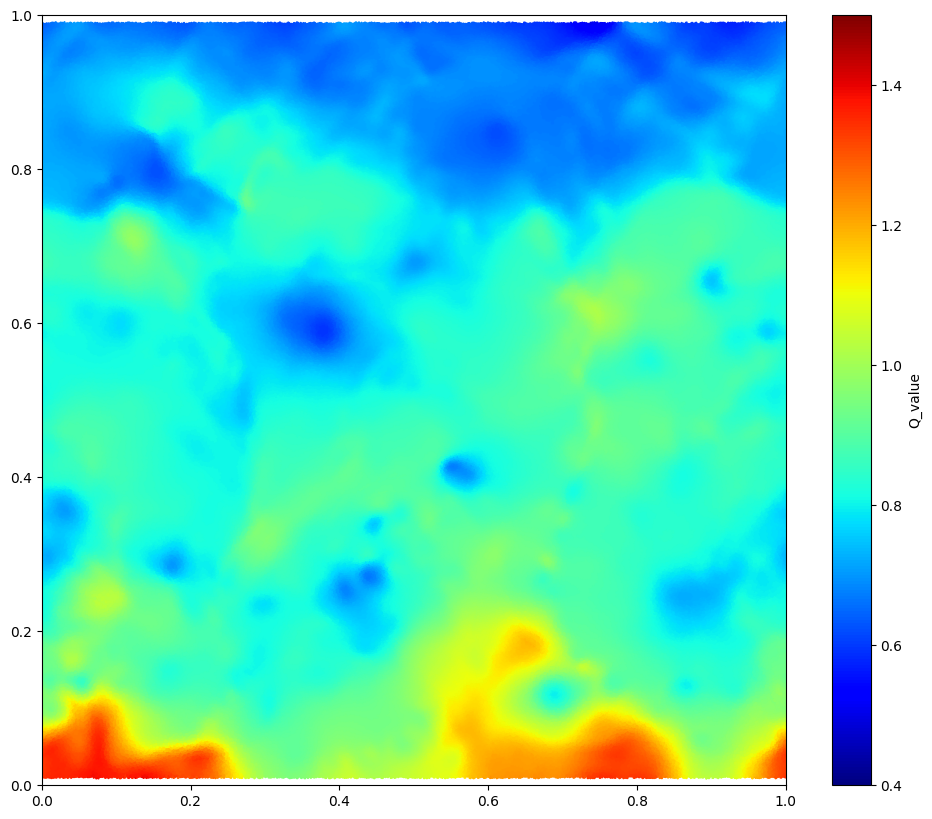

In [25]:
import numpy as np

s, p, q = v.process_file("files/rayleigh_taylor_instab_425x425/vmesh_RT_2_425x425_31000.csv")
v.plot_2D(p, q[:, 5], cmap = 'jet', vmin = 0.4, vmax = 1.5)

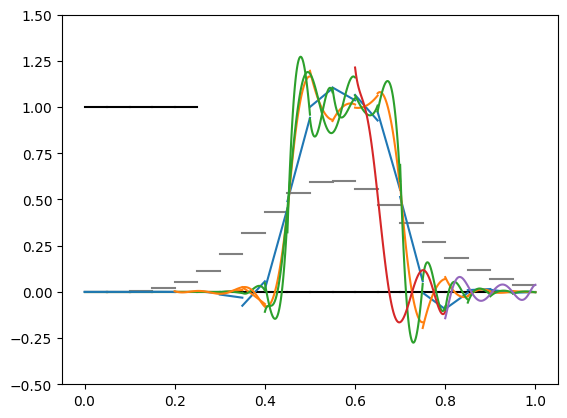

In [204]:
import numpy as np
import matplotlib.pyplot as plt
import vis_tk as v

#v.plot_1D(["cmesh0"], ["c"], "x", quantity_index=1, ylim=(-0.1, 1.1))
s, p, q = v.process_file("files/cmesh0.csv")

res = 100
lsp = np.linspace(-1, 1, res)

def getval(x, Q, dx):
    
    y = 0

    for i in range(1, len(Q)):
        y += Q[i]*x**(i-1)

    return y


for i in range(len(s)):
    dx = p[i][2][0]-p[i][1][0]
    lsp1 = np.linspace(i*dx, dx + i*dx, res)
    y = [getval(x, q[i], dx) for x in lsp]
    plt.plot(lsp1, y, color = "black")

plt.ylim(-0.5, 1.5)

#v.plot_1D(["cmesh0"], ["c"], "x", quantity_index=1, ylim=(-0.1, 1.1))
s, p, q = v.process_file("files/cmesh900.csv")

for i in range(len(s)):
    dx = p[i][2][0]-p[i][1][0]
    lsp1 = np.linspace(i*dx, dx + i*dx, res)
    y = [getval(x, q[i], dx) for x in lsp]
    plt.plot(lsp1, y, color = "gray")

s, p, q = v.process_file("files/cmesha900.csv")

for i in range(len(s)):
    dx = p[i][2][0]-p[i][1][0]
    lsp1 = np.linspace(i*dx, dx + i*dx, res)
    y = [getval(x, q[i], dx) for x in lsp]
    plt.plot(lsp1, y, color = "tab:blue")


s, p, q = v.process_file("files/cmeshb900.csv")

for i in range(len(s)):
    dx = p[i][2][0]-p[i][1][0]
    lsp1 = np.linspace(i*dx, dx + i*dx, res)
    y = [getval(x, q[i], dx) for x in lsp]
    plt.plot(lsp1, y, color = "tab:orange")


s, p, q = v.process_file("files/cmeshc900.csv")

for i in range(len(s)):
    dx = p[i][2][0]-p[i][1][0]
    lsp1 = np.linspace(i*dx, dx + i*dx, res)
    y = [getval(x, q[i], dx) for x in lsp]
    plt.plot(lsp1, y, color = "tab:green")

s, p, q = v.process_file("files/cmeshd900.csv")

for i in range(len(s)):
    dx = p[i][2][0]-p[i][1][0]
    lsp1 = np.linspace(i*dx, dx + i*dx, res)
    y = [getval(x, q[i], dx) for x in lsp]
    plt.plot(lsp1, y)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import vis_tk as v

#v.plot_1D(["cmesh0"], ["c"], "x", quantity_index=1, ylim=(-0.1, 1.1))

res = 100
lsp = np.linspace(-1, 1, res)

def getval(x, Q):
    
    y = 0

    for i in range(1, len(Q)):
        y += Q[i]*x**(i-1)

    return y



def plotit(filename, color = None, lnstl = '-', lbl = None):
    s, p, q = v.process_file("files/"+ filename + ".csv")
    plt.ylim(-0.5, 1.5)
    for i in range(len(s)):
        dx = p[i][2][0]-p[i][1][0]
        lsp1 = np.linspace(i*dx, dx + i*dx, res)
        y = [getval(x, q[i]) for x in lsp]
        plt.plot(lsp1, y, color = color, linestyle = lnstl)
        if i == 0:
            plt.plot(lsp1, y, color = color, linestyle = lnstl, label = lbl)

    print(q[0][0])

plotit("cmesha0", "grey", '--', "initial condition")
plotit("cmesha700", "tab:blue", lbl = r"$N_p = 0$")
plotit("cmeshb700", "tab:orange", lbl = r"$N_p = 1$")
plotit("cmeshc700", "tab:green", lbl = r"$N_p = 2$")
plotit("cmeshd700", "tab:red", lbl = r"$N_p = 3$")

plt.title(r"DG scalar upwind advection, $N_{row} = 20$, t = 0.3")
plt.xlabel("x in [a.u.]")
plt.ylabel("Q-Value in [a.u.]")
plt.legend()
plt.savefig('figures/DG_scalar_upwind_advection_20.png', dpi = 1000)

FileNotFoundError: [Errno 2] No such file or directory: 'files/cmesha0.csv'

0.6
0.6


(-0.1, 1.1)

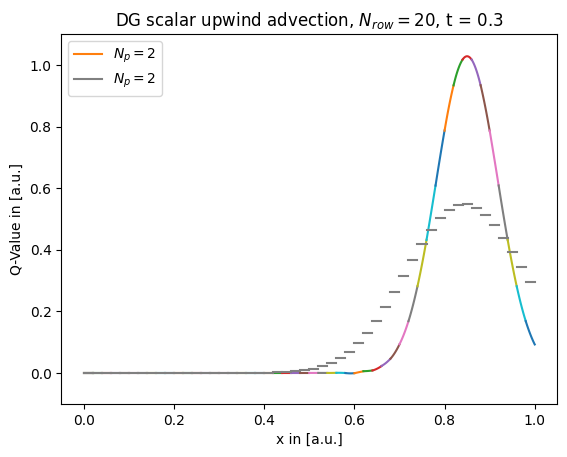

In [399]:
plotit("cmeshe1200", lbl = r"$N_p = 2$")
plotit("cmeshea1200", lbl = r"$N_p = 2$", color = 'gray')

plt.title(r"DG scalar upwind advection, $N_{row} = 20$, t = 0.3")
plt.xlabel("x in [a.u.]")
plt.ylabel("Q-Value in [a.u.]")
plt.legend()
plt.ylim(-0.1, 1.1)
#plt.savefig('figures/DG_scalar_upwind_advection_20.png', dpi = 1000)

MovieWriter imagemagick unavailable; using Pillow instead.


0.0
0.0
0.0
0.0
0.005
0.005
0.01
0.01
0.015
0.015
0.02
0.02
0.025
0.025
0.03
0.03
0.035
0.035
0.04
0.04
0.045
0.045
0.05
0.05
0.055
0.055
0.06
0.06
0.065
0.065
0.07
0.07
0.075
0.075
0.08
0.08
0.085
0.085
0.09
0.09
0.095
0.095
0.1
0.1
0.105
0.105
0.11
0.11
0.115
0.115
0.12
0.12
0.125
0.125
0.13
0.13
0.135
0.135
0.14
0.14
0.145
0.145
0.15
0.15
0.155
0.155
0.16
0.16
0.165
0.165
0.17
0.17
0.175
0.175
0.18
0.18
0.185
0.185
0.19
0.19
0.195
0.195
0.2
0.2
0.205
0.205
0.21
0.21
0.215
0.215
0.22
0.22
0.225
0.225
0.23
0.23
0.235
0.235
0.24
0.24
0.245
0.245
0.25
0.25
0.255
0.255
0.26
0.26
0.265
0.265
0.27
0.27
0.275
0.275
0.28
0.28
0.285
0.285
0.29
0.29
0.295
0.295
0.3
0.3
0.305
0.305
0.31
0.31
0.315
0.315
0.32
0.32
0.325
0.325
0.33
0.33
0.335
0.335
0.34
0.34
0.345
0.345
0.35
0.35
0.355
0.355
0.36
0.36
0.365
0.365
0.37
0.37
0.375
0.375
0.38
0.38
0.385
0.385
0.39
0.39
0.395
0.395
0.4
0.4
0.405
0.405
0.41
0.41
0.415
0.415
0.42
0.42
0.425
0.425
0.43
0.43
0.435
0.435
0.44
0.44
0.445
0.445
0.45
0.45
0.

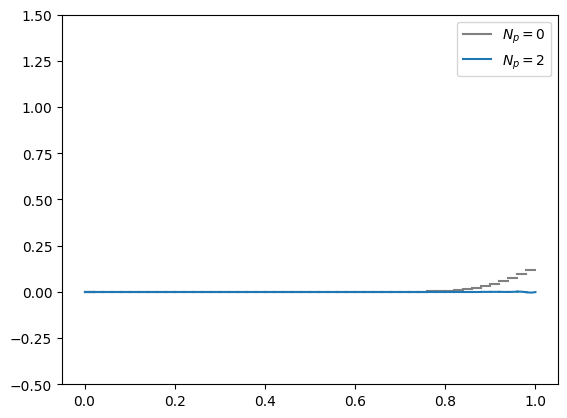

In [400]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Initialisiere den Plot
fig, ax = plt.subplots()
ax.set_title(r"DG scalar upwind advection, $N_{row} = 50$")
ax.set_xlabel("x in [a.u.]")
ax.set_ylabel("Q-Value in [a.u.]")

# Funktion, die für jedes Frame der Animation aufgerufen wird
def animate(i):
    ax.clear()
    file_nr = i * 10  # Die Dateinummer ändert sich in 100er Schritten
    plotit(f"cmeshea{file_nr}", "gray", lbl=r"$N_p = 0$")
    plotit(f"cmeshe{file_nr}", "tab:blue", lbl=r"$N_p = 2$")
    ax.legend()

# Erstelle die Animation
ani = animation.FuncAnimation(fig, animate, frames=200, interval=30)  # 101 Frames, alle 100 Schritte bis 10000

# Speichern als GIF
ani.save('DG_scalar_upwind_advection.gif', writer='imagemagick', dpi=300)

plt.show()

0.0
0.4
0.4
0.4


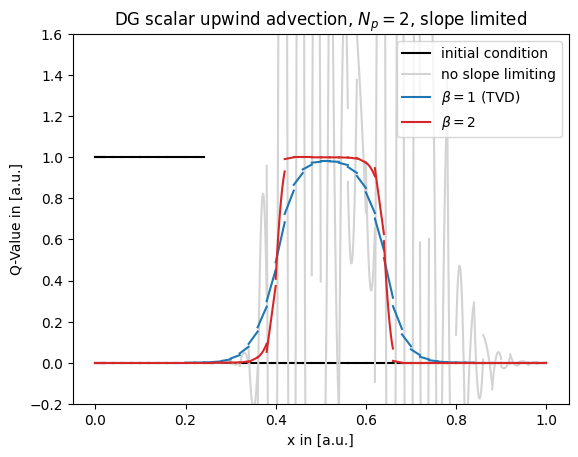

In [3]:
plotit("cmesh_bar_0", "black", lbl = "initial condition")
plotit("cmesh_bar_400", "lightgray", lbl = "no slope limiting")
plotit("cmesh_bar_sl1_400", "tab:blue", lbl = r"$\beta = 1$ (TVD)")
plotit("cmesh_bar_sl2_400", "tab:red", lbl = r"$\beta = 2$")
plt.legend(loc = 1)
plt.title(r"DG scalar upwind advection, $N_p = 2$, slope limited")
plt.xlabel("x in [a.u.]")
plt.ylabel("Q-Value in [a.u.]")
plt.ylim((-0.2, 1.6))
plt.savefig('figures/DG_slope_limited_50.png', dpi = 1000)

MovieWriter imagemagick unavailable; using Pillow instead.


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.005
0.005
0.005
0.0
0.01
0.01
0.01
0.0
0.015
0.015
0.015
0.0
0.02
0.02
0.02
0.0
0.025
0.025
0.025
0.0
0.03
0.03
0.03
0.0
0.035
0.035
0.035
0.0
0.04
0.04
0.04
0.0
0.045
0.045
0.045
0.0
0.05
0.05
0.05
0.0
0.055
0.055
0.055
0.0
0.06
0.06
0.06
0.0
0.065
0.065
0.065
0.0
0.07
0.07
0.07
0.0
0.075
0.075
0.075
0.0
0.08
0.08
0.08
0.0
0.085
0.085
0.085
0.0
0.09
0.09
0.09
0.0
0.095
0.095
0.095
0.0
0.1
0.1
0.1
0.0
0.105
0.105
0.105
0.0
0.11
0.11
0.11
0.0
0.115
0.115
0.115
0.0
0.12
0.12
0.12
0.0
0.125
0.125
0.125
0.0
0.13
0.13
0.13
0.0
0.135
0.135
0.135
0.0
0.14
0.14
0.14
0.0
0.145
0.145
0.145
0.0
0.15
0.15
0.15
0.0
0.155
0.155
0.155
0.0
0.16
0.16
0.16
0.0
0.165
0.165
0.165
0.0
0.17
0.17
0.17
0.0
0.175
0.175
0.175
0.0
0.18
0.18
0.18
0.0
0.185
0.185
0.185
0.0
0.19
0.19
0.19
0.0
0.195
0.195
0.195
0.0
0.2
0.2
0.2
0.0
0.205
0.205
0.205
0.0
0.21
0.21
0.21
0.0
0.215
0.215
0.215
0.0
0.22
0.22
0.22
0.0
0.225
0.225
0.225
0.0
0.23
0.23
0.23
0.0
0.235
0.235
0.235
0.0
0.24


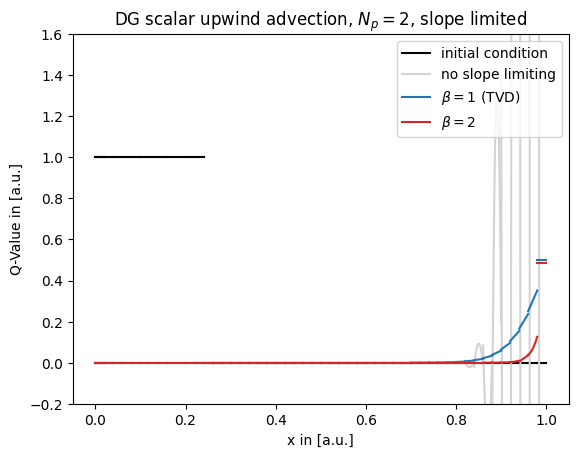

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Initialisiere den Plot
fig, ax = plt.subplots()
ax.set_title(r"DG scalar upwind advection, $N_p = 2$, slope limited")
ax.set_xlabel("x in [a.u.]")
ax.set_ylabel("Q-Value in [a.u.]")

# Funktion, die für jedes Frame der Animation aufgerufen wird
def animate(i):
    ax.clear()
    file_nr = i * 5 
    plotit("cmesh_bar_0", "black", lbl = "initial condition")
    plotit(f"cmesh_bar_{file_nr}", "lightgray", lbl = "no slope limiting")
    plotit(f"cmesh_bar_sl1_{file_nr}", "tab:blue", lbl = r"$\beta = 1$ (TVD)")
    plotit(f"cmesh_bar_sl2_{file_nr}", "tab:red", lbl = r"$\beta = 2$")
    ax.set_title(r"DG scalar upwind advection, $N_p = 2$, slope limited")
    ax.set_xlabel("x in [a.u.]")
    ax.set_ylabel("Q-Value in [a.u.]")
    ax.set_ylim((-0.2, 1.6))
    ax.legend(loc = 1)

# Erstelle die Animation
ani = animation.FuncAnimation(fig, animate, frames=200, interval=35)  # 101 Frames, alle 100 Schritte bis 10000

# Speichern als GIF
ani.save('figures/DG_bar_slopelimiting.gif', writer='imagemagick', dpi=500)

plt.show()

0.0
0.3
0.3
0.3


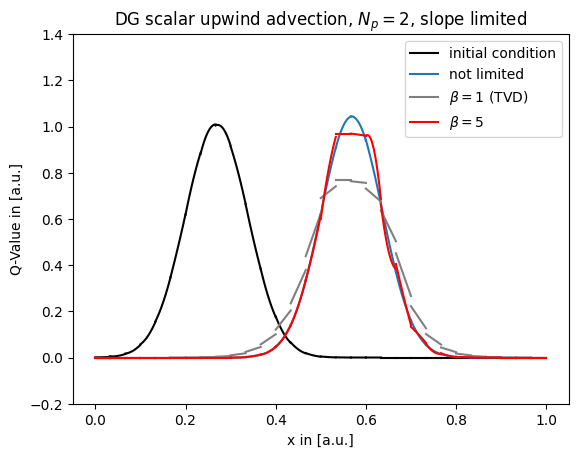

In [31]:
plotit("cmesh_gauss_0", "black", lbl = "initial condition")
plotit("cmesh_gauss_300", color="tab:blue", lbl = 'not limited')
plotit("cmesh_gauss_sl1_300", color = 'gray', lbl = r'$\beta = 1$ (TVD)')
plotit("cmesh_gauss_sl2_300", color = 'red', lbl = r'$\beta = 5$')
plt.legend(loc = 1)
plt.title(r"DG scalar upwind advection, $N_p = 2$, slope limited")
plt.xlabel("x in [a.u.]")
plt.ylabel("Q-Value in [a.u.]")
plt.ylim((-0.2, 1.4))
plt.savefig('figures/DG_slope_limited_smooth.pdf', dpi = 1000)

MovieWriter imagemagick unavailable; using Pillow instead.


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.005
0.005
0.005
0.0
0.01
0.01
0.01
0.0
0.015
0.015
0.015
0.0
0.02
0.02
0.02
0.0
0.025
0.025
0.025
0.0
0.03
0.03
0.03
0.0
0.035
0.035
0.035
0.0
0.04
0.04
0.04
0.0
0.045
0.045
0.045
0.0
0.05
0.05
0.05
0.0
0.055
0.055
0.055
0.0
0.06
0.06
0.06
0.0
0.065
0.065
0.065
0.0
0.07
0.07
0.07
0.0
0.075
0.075
0.075
0.0
0.08
0.08
0.08
0.0
0.085
0.085
0.085
0.0
0.09
0.09
0.09
0.0
0.095
0.095
0.095
0.0
0.1
0.1
0.1
0.0
0.105
0.105
0.105
0.0
0.11
0.11
0.11
0.0
0.115
0.115
0.115
0.0
0.12
0.12
0.12
0.0
0.125
0.125
0.125
0.0
0.13
0.13
0.13
0.0
0.135
0.135
0.135
0.0
0.14
0.14
0.14
0.0
0.145
0.145
0.145
0.0
0.15
0.15
0.15
0.0
0.155
0.155
0.155
0.0
0.16
0.16
0.16
0.0
0.165
0.165
0.165
0.0
0.17
0.17
0.17
0.0
0.175
0.175
0.175
0.0
0.18
0.18
0.18
0.0
0.185
0.185
0.185
0.0
0.19
0.19
0.19
0.0
0.195
0.195
0.195
0.0
0.2
0.2
0.2
0.0
0.205
0.205
0.205
0.0
0.21
0.21
0.21
0.0
0.215
0.215
0.215
0.0
0.22
0.22
0.22
0.0
0.225
0.225
0.225
0.0
0.23
0.23
0.23
0.0
0.235
0.235
0.235
0.0
0.24


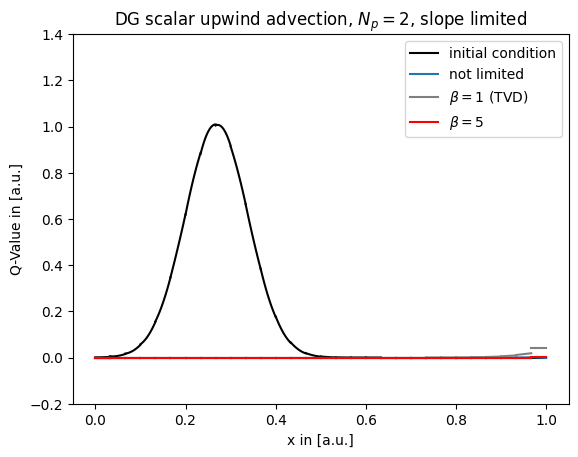

In [32]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Initialisiere den Plot
fig, ax = plt.subplots()
ax.set_title(r"DG scalar upwind advection, $N_p = 2$, slope limited")
ax.set_xlabel("x in [a.u.]")
ax.set_ylabel("Q-Value in [a.u.]")

# Funktion, die für jedes Frame der Animation aufgerufen wird
def animate(i):
    ax.clear()
    file_nr = i * 5 
    plotit("cmesh_gauss_0", "black", lbl = "initial condition")
    plotit(f"cmesh_gauss_{file_nr}", color="tab:blue", lbl = 'not limited')
    plotit(f"cmesh_gauss_sl1_{file_nr}", color = 'gray', lbl = r'$\beta = 1$ (TVD)')
    plotit(f"cmesh_gauss_sl2_{file_nr}", color = 'red', lbl = r'$\beta = 5$')
    ax.set_title(r"DG scalar upwind advection, $N_p = 2$, slope limited")
    ax.set_xlabel("x in [a.u.]")
    ax.set_ylabel("Q-Value in [a.u.]")
    ax.set_ylim((-0.2, 1.4))
    ax.legend(loc = 1)

# Erstelle die Animation
ani = animation.FuncAnimation(fig, animate, frames=200, interval=35)  # 101 Frames, alle 100 Schritte bis 10000

# Speichern als GIF
ani.save('figures/DG_smooth_slopelimiting.gif', writer='imagemagick', dpi=500)

plt.show()

In [16]:
def plotit(filename, color = None, lnstl = '-', lbl = None, res = 100):
    s, p, q = v.process_file("files/"+ filename + ".csv")
    plt.ylim(-0.5, 1.5)
    for i in range(len(s)):
        dx = p[i][2][0]-p[i][1][0]
        lsp1 = np.linspace(i*dx, dx + i*dx, res)
        lsp = np.linspace(-1, 1, res)
        y = [getval(x, q[i]) for x in lsp]
        plt.plot(lsp1, y, color = color, linestyle = lnstl)
        if i == 0:
            plt.plot(lsp1, y, color = color, linestyle = lnstl, label = lbl)

    print(q[0][0])

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import vis_tk as v
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib.collections import PolyCollection
from matplotlib.animation import FuncAnimation
from tqdm import tqdm
from scipy.optimize import curve_fit
from scipy.optimize import brentq

def getval(x, Q):
    
    y = 0

    for i in range(1, len(Q)):
        y += Q[i]*x**(i-1)

    return y

0.0


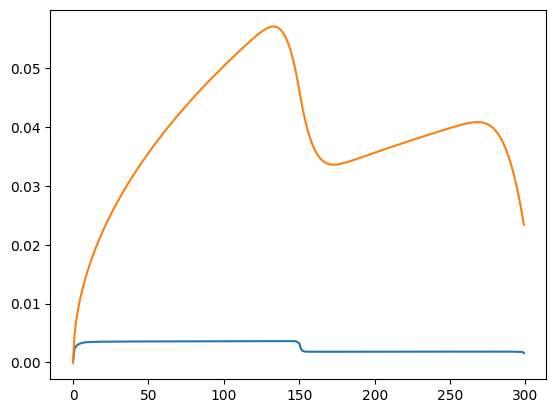

In [53]:
lsp = np.linspace(0, 1, 1000)
y = [v.analytic_Q(x, 0, 1, 0, 0.5) for x in lsp]
#plt.plot(lsp, y, color = "grey")


def get_L1_DG_bar(filename):

    s, p, q = v.process_file("files/" + filename + ".csv")
    t = q[0, 0]
    N_elements = np.shape(q[:, 1:])[0]

    def get_element_error(index, res = 100):
        local_lsp = np.linspace(p[index][1][0]+1e-16, p[index][2][0]-1e-16, res)
        y_theo = np.array([v.analytic_Q(x, t, 1, 0, 0.5) for x in local_lsp])
        lsp = np.linspace(-1, 1, res)
        y_sim = np.array([getval(x, q[index]) for x in lsp])

        #print(y_theo)
        #print(y_sim)

        L_elt = (np.sum(np.abs(y_theo - y_sim)))/res
        return L_elt

    L1_sum = 0

    for i in range(N_elements):
        L1_sum += get_element_error(i)
    
    return L1_sum/N_elements

print(get_L1_DG_bar("cmesh_gauss_sl1_0"))

#l1s = [get_L1_DG_bar(f"cmesh_gauss_sl1_{hm}") for hm in range(0, 3000, 10)]
l0s = [get_L1_DG_bar(f"cmesh_gauss_sl0_{hm}") for hm in range(0, 3000, 10)]
f0s = [get_L1_DG_bar(f"cmesh_gauss_fl0_{hm}") for hm in range(0, 3000, 10)]
#plt.plot(l1s)
plt.plot(l0s)
plt.plot(f0s)
plt.show()

0.0
0.035
0.175
0.35


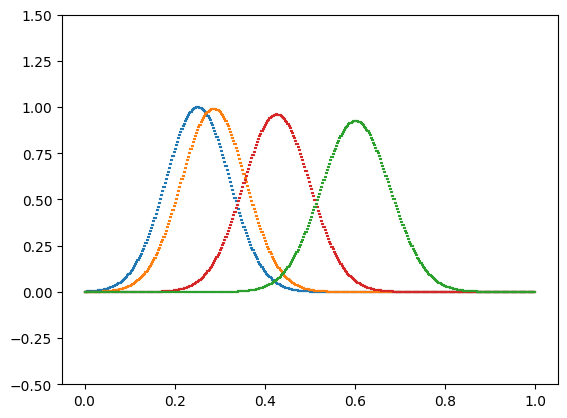

In [150]:
plotit("cmesh_Nbf1_res400_0", color = "tab:blue")
plotit("cmesh_Nbf1_res400_400", color = "tab:orange")
plotit("cmesh_Nbf1_res400_2000", color = "tab:red")
plotit("cmesh_Nbf1_res400_4000", color = "tab:green")
#plotit("cmesh_Nbf3_res100_0", color = "tab:red")
#plotit("cmesh_Nbf3_res400_400", color = "tab:red")
#plotit("cmesh_Nbf3_res400_2000", color = "tab:red")
#plotit("cmesh_Nbf3_res400_4000", color = "tab:red")

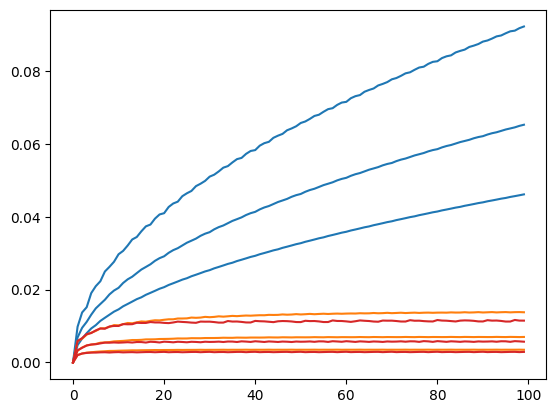

In [59]:
l_1_100 = [get_L1_DG_bar(f"cmesh_Nbf1_res100_{hm}") for hm in range(0, 1000, 10)]
l_1_200 = [get_L1_DG_bar(f"cmesh_Nbf1_res200_{hm}") for hm in range(0, 2000, 20)]
l_1_400 = [get_L1_DG_bar(f"cmesh_Nbf1_res400_{hm}") for hm in range(0, 4000, 40)]
l_2_100 = [get_L1_DG_bar(f"cmesh_Nbf2_res100_{hm}") for hm in range(0, 1000, 10)]
l_2_200 = [get_L1_DG_bar(f"cmesh_Nbf2_res200_{hm}") for hm in range(0, 2000, 20)]
l_2_400 = [get_L1_DG_bar(f"cmesh_Nbf2_res400_{hm}") for hm in range(0, 4000, 40)]
l_3_100 = [get_L1_DG_bar(f"cmesh_Nbf3_res100_{hm}") for hm in range(0, 1000, 10)]
l_3_200 = [get_L1_DG_bar(f"cmesh_Nbf3_res200_{hm}") for hm in range(0, 2000, 20)]
l_3_400 = [get_L1_DG_bar(f"cmesh_Nbf3_res400_{hm}") for hm in range(0, 4000, 40)]
plt.plot(l_1_100, color = "tab:blue")
plt.plot(l_1_200, color = "tab:blue")
plt.plot(l_1_400, color = "tab:blue")
plt.plot(l_2_100, color = "tab:orange")
plt.plot(l_2_200, color = "tab:orange")
plt.plot(l_2_400, color = "tab:orange")
plt.plot(l_3_100, color = "tab:red")
plt.plot(l_3_200, color = "tab:red")
plt.plot(l_3_400, color = "tab:red")
plt.show()

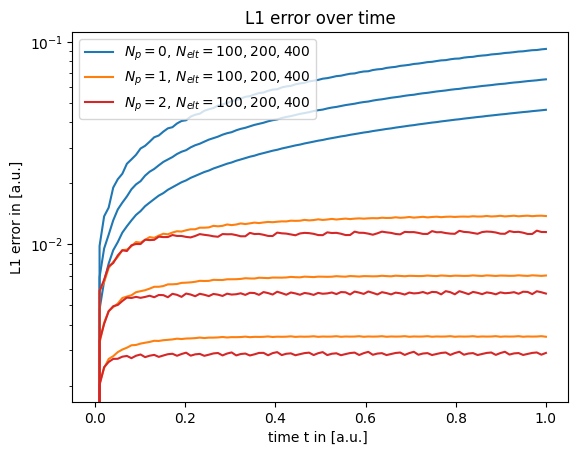

In [72]:
lspd = np.linspace(0, 1, len(l_2_100))
plt.plot(lspd, l_1_100, color = "tab:blue", label = r"$N_p = 0$, $N_{elt} = 100, 200, 400$")
plt.plot(lspd, l_1_200, color = "tab:blue")
plt.plot(lspd, l_1_400, color = "tab:blue")
plt.plot(lspd, l_2_100, color = "tab:orange", label = r"$N_p = 1$, $N_{elt} = 100, 200, 400$")
plt.plot(lspd, l_2_200, color = "tab:orange")
plt.plot(lspd, l_2_400, color = "tab:orange")
plt.plot(lspd, l_3_100, color = "tab:red", label = r"$N_p = 2$, $N_{elt} = 100, 200, 400$")
plt.plot(lspd, l_3_200, color = "tab:red")
plt.plot(lspd, l_3_400, color = "tab:red")
plt.yscale("log")
plt.ylabel("L1 error in [a.u.]")
plt.xlabel("time t in [a.u.] ")
plt.title("L1 error over time")
plt.legend()
plt.savefig("figures/DG_L1_over_time.png", dpi = 500)
plt.show()

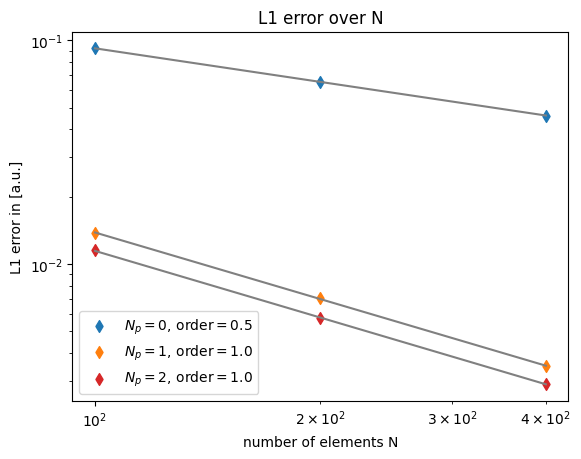

In [117]:
N = np.array([100, 200, 400])
l_N_1 = [l_1_100[-1], l_1_200[-1], l_1_400[-1]]
l_N_2 = [l_2_100[-1], l_2_200[-1], l_2_400[-1]]
l_N_3 = [l_3_100[-1], l_3_200[-1], l_3_400[-1]]

popt1, pcov1 = curve_fit(v.fit_function, np.log(N), np.log(l_N_1))
popt2, pcov2 = curve_fit(v.fit_function, np.log(N), np.log(l_N_2))
popt3, pcov3 = curve_fit(v.fit_function, np.log(N), np.log(l_N_3))

plt.scatter(N, l_N_1, marker = "d", label = fr"$N_p = 0$, order$ = {round(abs(popt1[0]),1)}$")
plt.scatter(N, l_N_2, marker = "d", label = fr"$N_p = 1$, order$ = {round(abs(popt2[0]),1)}$")
plt.scatter(N, l_N_3, marker = "d", label = fr"$N_p = 2$, order$ = {round(abs(popt3[0]),1)}$", color = "tab:red")
plt.plot(N, np.exp(v.fit_function(np.log(N), *popt1)),color = "grey")
plt.plot(N, np.exp(v.fit_function(np.log(N), *popt2)), color = "grey")
plt.plot(N, np.exp(v.fit_function(np.log(N), *popt3)), color = "grey")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.title("L1 error over N")
plt.ylabel("L1 error in [a.u.]")
plt.xlabel("number of elements N")
plt.savefig("figures/DG_L1_over_N.png", dpi = 500)
plt.show()

In [151]:
def analytic_gauss(x, t):
    return np.exp(-(10 * (x - 0.25 - t)) * (10 * (x - 0.25 - t)))

def get_L1_DG_gauss(filename):

    s, p, q = v.process_file("files/" + filename + ".csv")
    t = q[0, 0]
    N_elements = np.shape(q[:, 1:])[0]

    def get_element_error(index, res = 100):
        local_lsp = np.linspace(p[index][1][0]+1e-16, p[index][2][0]-1e-16, res)
        y_theo = np.array([analytic_gauss(x, t) for x in local_lsp])
        lsp = np.linspace(-1, 1, res)
        y_sim = np.array([getval(x, q[index]) for x in lsp])

        #print(y_theo)
        #print(y_sim)

        L_elt = (np.sum(np.abs(y_theo - y_sim)))/res
        return L_elt

    L1_sum = 0

    for i in range(N_elements):
        L1_sum += get_element_error(i)
    
    return L1_sum/N_elements

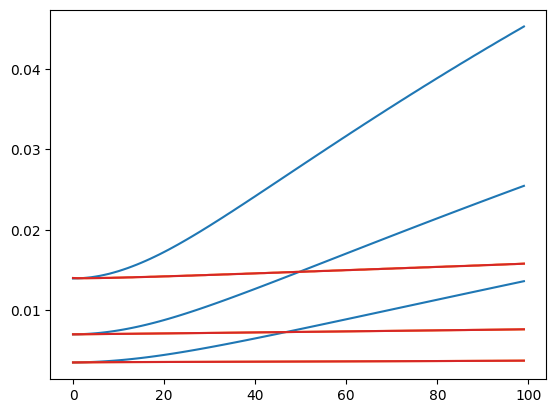

In [152]:
l_1_100 = [get_L1_DG_gauss(f"cmesh_Nbf1_res100_{hm}") for hm in range(0, 1000, 10)]
l_1_200 = [get_L1_DG_gauss(f"cmesh_Nbf1_res200_{hm}") for hm in range(0, 2000, 20)]
l_1_400 = [get_L1_DG_gauss(f"cmesh_Nbf1_res400_{hm}") for hm in range(0, 4000, 40)]
l_2_100 = [get_L1_DG_gauss(f"cmesh_Nbf2_res100_{hm}") for hm in range(0, 1000, 10)]
l_2_200 = [get_L1_DG_gauss(f"cmesh_Nbf2_res200_{hm}") for hm in range(0, 2000, 20)]
l_2_400 = [get_L1_DG_gauss(f"cmesh_Nbf2_res400_{hm}") for hm in range(0, 4000, 40)]
l_3_100 = [get_L1_DG_gauss(f"cmesh_Nbf3_res100_{hm}") for hm in range(0, 1000, 10)]
l_3_200 = [get_L1_DG_gauss(f"cmesh_Nbf3_res200_{hm}") for hm in range(0, 2000, 20)]
l_3_400 = [get_L1_DG_gauss(f"cmesh_Nbf3_res400_{hm}") for hm in range(0, 4000, 40)]
plt.plot(l_1_100, color = "tab:blue")
plt.plot(l_1_200, color = "tab:blue")
plt.plot(l_1_400, color = "tab:blue")
plt.plot(l_2_100, color = "tab:orange")
plt.plot(l_2_200, color = "tab:orange")
plt.plot(l_2_400, color = "tab:orange")
plt.plot(l_3_100, color = "tab:red")
plt.plot(l_3_200, color = "tab:red")
plt.plot(l_3_400, color = "tab:red")
plt.show()